<h1 style="text-align: center;">Project New York City TLC Trip</h1>
<h3 style="text-align: center;">Ghaisan Rabbani</h3>

---

# **Section 1. Business Context**

## **1.1 Context**

NYC TLC (Taxi and Limousine Commission) adalah lembaga pemerintah yang diatur oleh Departemen Transportasi Kota New York dan mengatur dan mengawasi industri transportasi taksi, limusin, dan layanan ride-hailing (seperti Uber, Lyft) di New York City. NYC TLC bertanggung jawab untuk mengatur tarif, melisensikan pengemudi, mengawasi armada kendaraan, serta memastikan keamanan dan kenyamanan bagi penumpang. Lembaga ini memainkan peran penting dalam menjaga agar transportasi publik di NYC tetap efisien, terjangkau, dan aman.

Alur sistem bisnis NYC TLC melibatkan beberapa proses utama yang bekerja secara terintegrasi untuk mengelola operasi, pengawasan, dan pelayanan bagi pengemudi serta pelanggan.
1. Pendaftaran dan Lisensi Pengemudi dan Kendaraan
1. Penetapan Tarif dan Regulasi
1. Sistem Distribusi Kendaraan dan Penugasan Perjalanan
1. Pengawasan Kualitas Layanan


## **1.2 Problem Statements**
1. Permintaan taksi di New York City demand sepanjang hari dan minggu. Faktor-faktor seperti jam sibuk dan akhir pekan dapat menyebabkan lonjakan permintaan. Selain itu, permintaan di berbagai lokasi (misalnya, di pusat kota atau bandara) juga sangat berbeda. Hal ini dapat menyebabkan ketidakseimbangan antara pasokan kendaraan dan permintaan, yang dapat meningkatkan waktu tunggu penumpang.

- Bagaimana demand permintaan taksi di NYC sepanjang hari?
- Apa yang mempengaruhi permintaan taksi pada hari-hari tertentu?
- Apakah permintaan lebih tinggi pada akhir pekan dibandingkan hari biasa?
- Bagaimana permintaan taksi berbeda di berbagai lokasi?
- Di mana permintaan tertinggi untuk taksi berdasarkan zona penjemputan dan pengantaran?
---
2. Sistem tarif dinamis yang digunakan oleh NYC TLC dapat menyebabkan demand harga yang tidak selalu sesuai dengan permintaan. Tarif yang lebih tinggi selama jam sibuk atau event besar dapat menyebabkan penurunan permintaan, sementara tarif lebih rendah dapat meningkatkan jumlah pelanggan, tetapi dengan risiko pendapatan lebih rendah.
- Bagaimana pengaruh tarif dinamis terhadap permintaan taksi di NYC?
- Bagaimana cara menyesuaikan tarif dinamis untuk memastikan pendapatan maksimal tanpa merugikan permintaan?
---
3. Sistem layanan taksi sering kali menghadapi masalah dalam memahami apa yang memotivasi pelanggan untuk memberikan tip yang lebih besar kepada pengemudi. Walaupun tip dapat bervariasi tergantung pada pelanggan, perjalanan, dan situasi lainnya, ada beberapa faktor yang perlu dianalisis lebih lanjut untuk mengetahui seberapa besar pengaruh faktor-faktor tersebut terhadap keputusan pelanggan dalam memberikan tip.<br>

- faktor apa saja yg membuat customer memberikan tip?
- Apakah tarif perjalanan yang lebih tinggi cenderung menghasilkan tip lebih besar?
- Bagaimana durasi perjalanan dan jarak memengaruhi jumlah tip?



## **1.3 Key Objective**
- Memahami pola permintaan taksi sepanjang hari.
- Mengidentifikasi faktor yang memengaruhi permintaan taksi di hari-hari tertentu dan Menganalisis perbedaan permintaan taksi di lokasi-lokasi tertentu, seperti bandara, pusat kota, atau daerah pinggiran kota.
- Mengidentifikasi dan Menyesuaikan tarif dinamis agar tidak merugikan pendapatan atau kepuasan pelanggan, serta menjaga keseimbangan antara permintaan dan penawaran.
- Menganalisis faktor-faktor yang memengaruhi pelanggan dalam memberikan tip kepada pengemudi.

---

# **Section 2. Data Understanding**

In [1]:
#import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\ghais\OneDrive\Documents\Purwadhika bootcamp\Modul 2. Data analysis\capstone\Data_analytics_project\data\raw\NYC TLC Trip Record.csv')
display(df.head(),df.tail())

C:\Users\ghais\AppData\Local\Temp\ipykernel_20352\621533642.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r'C:\Users\ghais\OneDrive\Documents\Purwadhika bootcamp\Modul 2. Data analysis\capstone\Data_analytics_project\data\raw\NYC TLC Trip Record.csv')


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN
68210,2,2023-01-31 23:51:00,2023-02-01 00:07:00,NaN,NaN,256,140,NaN,5.82,23.65,0.0,0.0,2.00,0.0,NaN,1.0,29.40,NaN,NaN,NaN


In [3]:
df_loc=pd.read_csv(r'C:\Users\ghais\OneDrive\Documents\Purwadhika bootcamp\Modul 2. Data analysis\capstone\Data_analytics_project\data\raw\taxi_zone_lookup.csv')
df_loc=df_loc.fillna("Unknown") #kolom kosong masih tidak diketahui didalam atau diluar new york
df_loc.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [4]:
#merge data
df = pd.merge(df, df_loc.add_prefix('PU'), left_on="PULocationID", right_on="PULocationID", how="inner")
df = pd.merge(df, df_loc.add_prefix('DO'), left_on="DOLocationID", right_on="DOLocationID", how="inner")

df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,total_amount,payment_type,trip_type,congestion_surcharge,PUBorough,PUZone,PUservice_zone,DOBorough,DOZone,DOservice_zone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,24.18,1.0,1.0,2.75,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,15.84,1.0,1.0,0.00,Manhattan,Bloomingdale,Yellow Zone,Manhattan,Central Park,Yellow Zone
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,...,11.64,1.0,1.0,0.00,Queens,Steinway,Boro Zone,Queens,Old Astoria,Boro Zone
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,10.20,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,Upper West Side North,Yellow Zone
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,8.00,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,East Harlem North,Boro Zone


## 2.1 Overview Data

In [5]:
#overview data

print(f'Overview Data:\n')
print("Rows:", df.shape[0])
print("Number of features:", df.shape[1])
print("Missing values:",df.isnull().sum().values.sum())
print("Duplicated : ",df.duplicated().any())

listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],data=listItem)
display(tabel1Desc)

Overview Data:

Rows: 68211
Number of features: 26
Missing values: 94165
Duplicated :  False


,Column Name,Number of Unique,Unique Sample
0,VendorID,2,"[2, 1]"
1,lpep_pickup_datetime,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 202..."
2,lpep_dropoff_datetime,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 202..."
3,store_and_fwd_flag,2,"[N, Y, nan]"
4,RatecodeID,6,"[1.0, 5.0, 4.0, 3.0, 2.0, 99.0, nan]"
5,PULocationID,226,"[166, 24, 223, 41, 181, 255, 75, 66, 195, 83, ..."
6,DOLocationID,249,"[143, 43, 179, 238, 74, 262, 45, 75, 166, 140,..."
7,passenger_count,10,"[1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 0.0, 7.0, 9.0, ..."
8,trip_distance,1870,"[2.58, 1.81, 0.0, 1.3, 1.1, 2.78, 3.8, 1.88, 1..."
9,fare_amount,2553,"[14.9, 10.7, 7.2, 6.5, 6.0, 17.7, 19.1, 14.2, ..."


Insight:<br>
Terdapat kolom nan atau tidak ada isinya untuk kolom `ehail_fee`

## 2.2 Feature information

In [6]:
df['lpep_dropoff_datetime']=pd.to_datetime(df['lpep_dropoff_datetime'])
df['lpep_pickup_datetime']=pd.to_datetime(df['lpep_pickup_datetime'])

print("\nInfo:")
print(df.info())


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               68211 non-null  int64         
 1   lpep_pickup_datetime   68211 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  68211 non-null  datetime64[ns]
 3   store_and_fwd_flag     63887 non-null  object        
 4   RatecodeID             63887 non-null  float64       
 5   PULocationID           68211 non-null  int64         
 6   DOLocationID           68211 non-null  int64         
 7   passenger_count        63887 non-null  float64       
 8   trip_distance          68211 non-null  float64       
 9   fare_amount            68211 non-null  float64       
 10  extra                  68211 non-null  float64       
 11  mta_tax                68211 non-null  float64       
 12  tip_amount             68211 non-null  float64       

Dari penjelasan di atas, dapat diketahui bahwa dataset ini berisi **informasi terkait perjalanan TLC ke New York**. Terdapat 20 kolom pada dataset df, yaitu:
1. `vendor_id`: ID unik untuk vendor
1. `lpep_pickup_datetime`: Waktu penjemputan penumpang
1. ` lpep_dropoff_datetime`: Waktu penurunan penumpang
1. `store_and_fwd_flag`: data disimpan dalam kendaraan dan diteruskan ke server (Y/n) 
1. `RateCodeID`: Kode tarif yang digunakan selama perjalanan 
1. `PuLocationID`: Zona lokasi penjemputan 
1. `DOLocationID`: Zona lokasi pemberhentian
1. `passenger_count`:  Jumlah penumpang di dalam kendaraan
1. `trip_distance`: Jarak perjalanan dalam mil 
1. `fare_amount`: mencatat tarif perjalanan berdasarkan waktu dan jarak yang ditempuh
1. `extra`: Biaya tambahan. Saat ini, biaya tambahan hanya 0,5 dolar dan 1 dolar untuk jam sibuk dan larut malam.
1. `mta_tax`: Pajak MTA sebesar 0,50 dolar yang diaktifkan secara otomatis berdasarkan tarif argo yang digunakan.
1. `tip_amount`: jumlah tip yang diberikan penumpang kepada pengemudi untuk pembayaran kredit
1. `tolls_amount`: biaya tol yang dibebankan selama perjalanan
1. `ehail_fee`: mencatat biaya tambahan sebesar 1 dolar yang dibebankan untuk perjalanan yang dipesan melalui platform elektronik (e-hail) 
1. `improvement_surcharge`: biaya tambahan yang dikenakan untuk meningkatkan kualitas layanan sebesar 0,30 dolar yang dinilai pada awal perjalanan.
1. `total_amount`: Jumlah total yang dibebankan kepada penumpang, tidak termasuk tip tunai. (jumlah_tarif, ekstra, mta_pajak, jumlah_tip, dan jumlah_tol, biaya ehail, dan biaya_perbaikan)
1. `payment_type`: jenis pembayaran yang digunakan oleh penumpang
1. `trip_type`: Kode untuk perjalanan
1. `congestion_surchange`: biaya tambahan sebesar 2,75 dolar yang dikenakan karena kemacetan lalu lintas.
1. `PUBorough` : wilayah penjumputan
1. `PUZone` : zona dalam wilayah penjumputan
1. `PUservice_zone` : jenis layanan yang ada di wilayah tersebut
1. `DOBorough` : wilayah pemberhentian
1. `DOZone` : zona dalam wilayah pemberhentian
1. `DOservice_zone` : jenis layanan yang ada di wilayah tersebut

**insight:**
- masih terdapat kolom yang tidak sesuai dengan typenya seperti `lpep_pickup_datetime` dan `lpep_dropoff_datetime`
- terdapat missing value

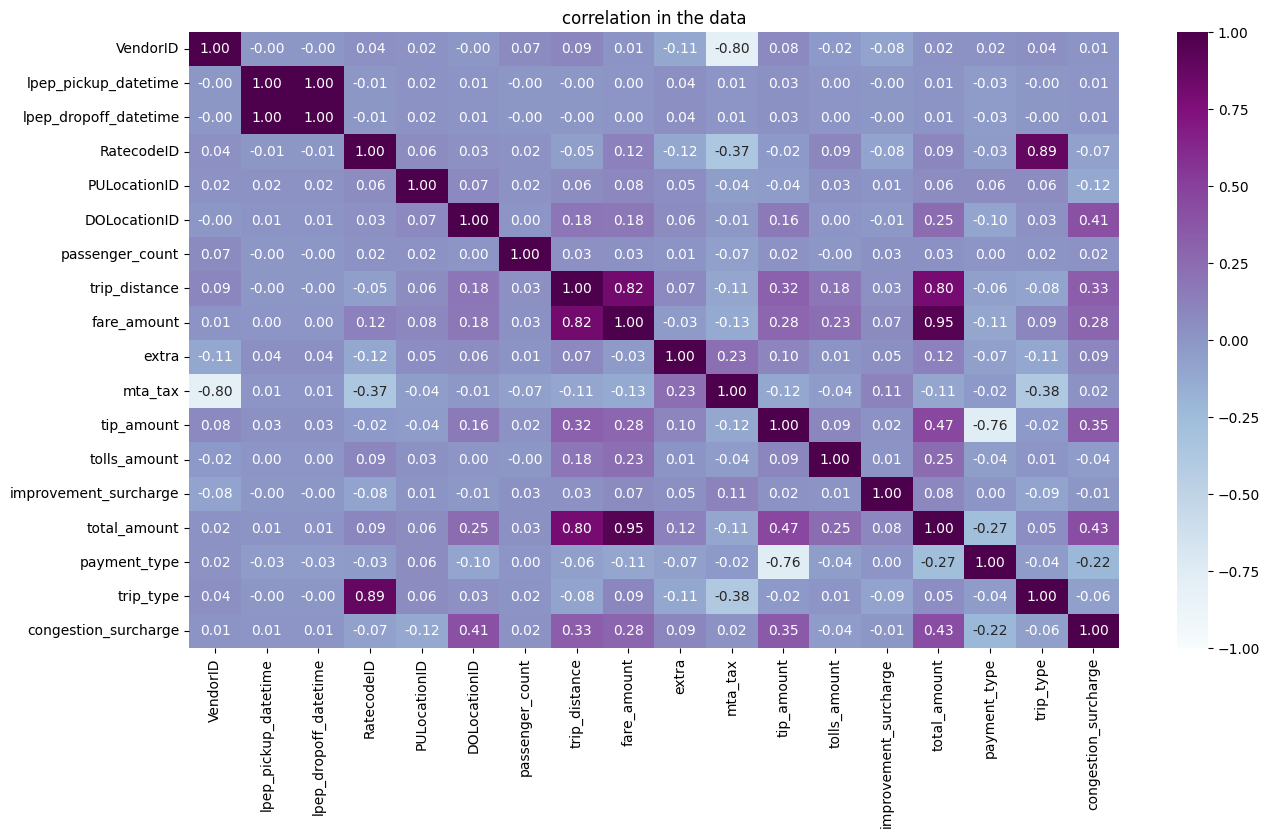

In [7]:
# corelation
df_int=df.drop(labels=['ehail_fee','store_and_fwd_flag','PUBorough','DOBorough', 'PUZone','DOZone','PUservice_zone','DOservice_zone'],axis=1)
plt.figure(figsize=(15,8))
sns.heatmap(df_int.corr('spearman'), vmin=-1, vmax=1, annot=True, fmt=".2f",cmap="BuPu")
plt.title("correlation in the data")
plt.show()

korelasi positif : 
- `total_amount` memiliki korelasi kuat `fare_amount` sebesar 0.95 dan `trip_distance` sebesar 0.8.
- `RatecodeID` memiliki korelasi kuat `trip_type` sebesar 0.89.
- `fare_amount` memiliki korelasi kuat `trip_distance` sebesar 0.82.

korelasi negatif : 
- `VendorID` memiliki korelasi kuat `mta_tax` sebesar -0.80 
- `payment_type` memiliki korelasi kuat `tip_amount` sebesar -0.76.


# **Section 3. Data Cleaning**

## **3.1 Delete Features and type features**

menghapus kolom yang tidak diperlukan

In [8]:
df=df.drop(['store_and_fwd_flag', 'ehail_fee', 'congestion_surcharge','extra', 'mta_tax', 'tolls_amount','improvement_surcharge', 'PUservice_zone', 'DOservice_zone'], axis=1)
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,total_amount,payment_type,trip_type,PUBorough,PUZone,DOBorough,DOZone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,1.0,166,143,1.0,2.58,14.90,4.03,24.18,1.0,1.0,Manhattan,Morningside Heights,Manhattan,Lincoln Square West
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,1.0,24,43,1.0,1.81,10.70,2.64,15.84,1.0,1.0,Manhattan,Bloomingdale,Manhattan,Central Park
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,1.0,223,179,1.0,0.00,7.20,1.94,11.64,1.0,1.0,Queens,Steinway,Queens,Old Astoria
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,1.0,41,238,1.0,1.30,6.50,1.70,10.20,1.0,1.0,Manhattan,Central Harlem,Manhattan,Upper West Side North
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,1.0,41,74,1.0,1.10,6.00,0.00,8.00,1.0,1.0,Manhattan,Central Harlem,Manhattan,East Harlem North
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,49,62,NaN,4070.82,15.70,0.00,16.70,NaN,NaN,Brooklyn,Clinton Hill,Brooklyn,Crown Heights South
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,10,205,NaN,2.14,4.41,0.00,5.41,NaN,NaN,Queens,Baisley Park,Queens,Saint Albans
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,66,37,NaN,3.44,16.53,3.51,21.04,NaN,NaN,Brooklyn,DUMBO/Vinegar Hill,Brooklyn,Bushwick South
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,225,189,NaN,3.03,14.98,3.20,19.18,NaN,NaN,Brooklyn,Stuyvesant Heights,Brooklyn,Prospect Heights


In [9]:
df['lpep_dropoff_datetime']=pd.to_datetime(df['lpep_dropoff_datetime'])
df['lpep_pickup_datetime']=pd.to_datetime(df['lpep_pickup_datetime'])

- `store_and_fwd_flag`: tidak terpakai karena tidak ingin menganalisa data yang disimpan atau tidak.
- `ehail_fee` : tidak ada value untuk kolom tersebut.
- `extra`, `mta_tax`, `tolls_amount`: pembayaran yang extra di drop karena tidak di analisa dan sudah diwakilkan total_amount
- `improvment_surchange`: di drop karena tidak di analisa
- `PUservice_zone`,`DOservice_zone` : di drop karena di wakilkan oleh data yang di merge


## **3.2 Missing Values**

In [10]:
import missingno as msno

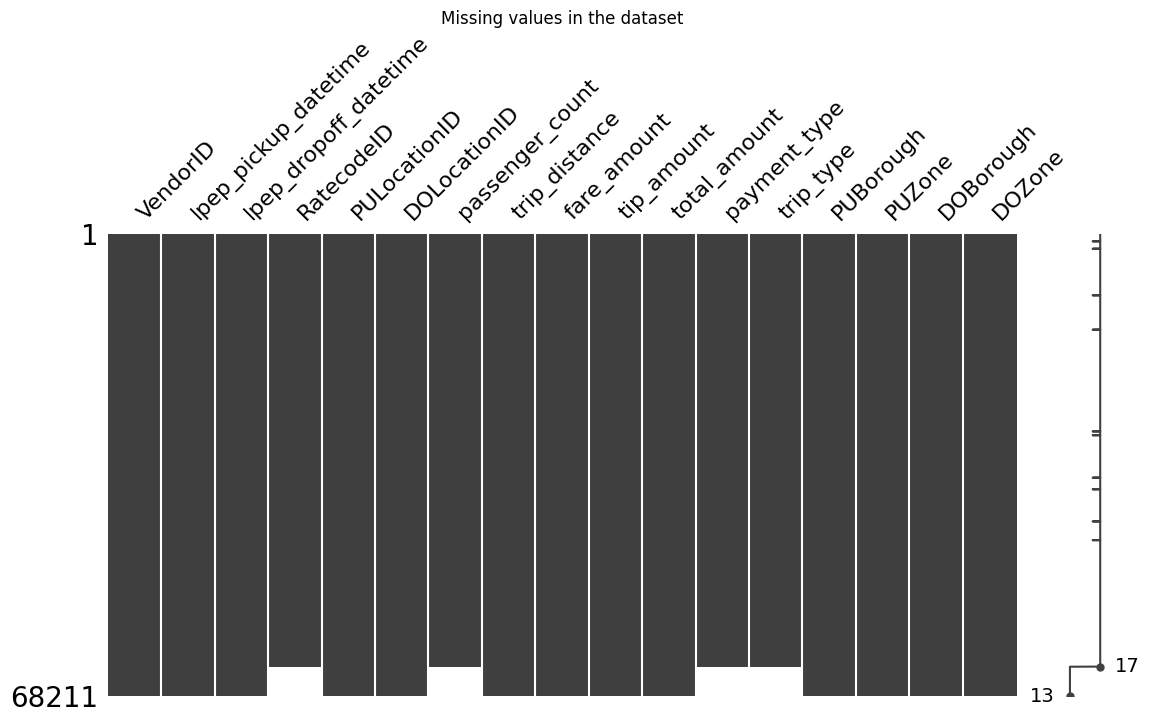

In [11]:
msno.matrix(df, figsize=(13, 6))
plt.title('Missing values in the dataset')
plt.show()

insight :
dilihat dari grafik missing no bahwa missing value terletak pada baris yang sama

In [12]:
df.isna().sum()

VendorID                    0
lpep_pickup_datetime        0
lpep_dropoff_datetime       0
RatecodeID               4324
PULocationID                0
DOLocationID                0
passenger_count          4324
trip_distance               0
fare_amount                 0
tip_amount                  0
total_amount                0
payment_type             4324
trip_type                4334
PUBorough                   0
PUZone                      0
DOBorough                   0
DOZone                      0
dtype: int64

### MV RatecodeID

akan dilakukan mengisi nilai missing values untuk kolom `RatecodeID`:

Menurut website NYC TLC (https://www.nyc.gov/site/tlc/passengers/taxi-fare.page) bahwa nilai RatecodeID yaitu :
1. `"Rate #01 – Standard City Rate"` -> tarif taksi dalam batas Kota.
1. `"Rate #2- JFK Airport"` -> tarif Perjalanan antara Manhattan dan Bandara John F. Kennedy (JFK) di kedua arah.
1. `"Rate #3 - Newark Airport"` -> tarif Perjalanan ke Bandara Newark (EWR).
1. `"Rate #04 – Out of City Rate to Nassau or Westchester"` tarif Setelah taksi melampaui batas Kota ke Nassau atau Westchester, yang dapat disimpulkan.
1. `"Rate #05 – Out of City Negotiated Flat Rate"` tarif antar kota yang dinegosiasikan.

Dapat disimpulkan bahwa RatecodeID merupakan missing values bertipe MAR (Missing At Random) yang dapat diisi dengan nilai yang sesuai berdasarkan informasi dari `PUBorough` dan `DOBorough`

In [13]:
df['RatecodeID'].value_counts()

RatecodeID
1.0     62103
5.0      1529
2.0       158
4.0        57
3.0        30
99.0       10
Name: count, dtype: int64

terdapat nilai 99 pada kolom `RatecodeID` yang seharusnya nilainya adalah 1-5, maka nilai 99 akan diubah ke kolom missing


In [14]:
df['RatecodeID'] = df['RatecodeID'].replace(99, np.nan) # replace 99 with NaN
df['RatecodeID'].value_counts() #cek values

RatecodeID
1.0    62103
5.0     1529
2.0      158
4.0       57
3.0       30
Name: count, dtype: int64

Cek missing values pada kolom `RatecodeID` dan kolom `RatecodeID` memiliki nilai missing value MAR, dimana kolom tersebut memiliki hubungan terhadap kolom yang berkaitan lokasi yaitu `PUBorough` dan `DOBorough`

In [15]:
df.loc[(df['RatecodeID'].isna()) ,['RatecodeID','PUBorough','DOBorough']]

,RatecodeID,PUBorough,DOBorough
1084,NaN,Brooklyn,Brooklyn
2174,NaN,Queens,Queens
9055,NaN,Brooklyn,Brooklyn
14125,NaN,Brooklyn,Brooklyn
29143,NaN,Brooklyn,Brooklyn
...,...,...,...
68206,NaN,Brooklyn,Brooklyn
68207,NaN,Queens,Queens
68208,NaN,Brooklyn,Brooklyn
68209,NaN,Brooklyn,Brooklyn


#### RatecodeID=2

- Mengisi missing values

In [16]:
#RatecodeID=2
df.loc[(df['PUBorough']=='Manhattan') & (df['DOZone']=='JFK Airport') & (df['RatecodeID'].isna()), 'RatecodeID'] = 2
df.loc[(df['PUZone']=='JFK Airport') & (df['DOBorough']=='Manhattan') & (df['RatecodeID'].isna()), 'RatecodeID'] = 2

- **Kolom Unknown** pada `RatecodeID`= 2

In [17]:
df.loc[(df['RatecodeID']==2) & (df['PUBorough']== 'Manhattan') & (df['DOBorough']=='Unknown'),['RatecodeID','PUBorough','PUZone','DOBorough','DOZone']]

,RatecodeID,PUBorough,PUZone,DOBorough,DOZone
8495,2.0,Manhattan,East Harlem South,Unknown,Unknown


karena nilai sesuai keberangkatan, maka bisa di isi untuk nilai unknown

In [18]:
#Akan diisi `DOBorouugh` dan `DOZone` yaitu Queens dan JFK Airport karena `RatecodeID`= 2 
df.loc[(df['RatecodeID']==2) & (df['PUBorough']== 'Manhattan') & (df['DOBorough']=='Unknown'),['DOBorough','DOZone']]=['Queens','JFK Airport']
#cek
df.loc[(df['RatecodeID']==2) & (df['PUBorough']== 'Manhattan') & (df['DOBorough']=='Unknown'),['RatecodeID','PUBorough','PUZone','DOBorough','DOZone']]

,RatecodeID,PUBorough,PUZone,DOBorough,DOZone


In [19]:
df.loc[(df['RatecodeID']==2) & (df['PUBorough']== 'Queens') & (df['DOBorough']=='Unknown'),['RatecodeID','PUBorough','PUZone','DOBorough','DOZone']]


,RatecodeID,PUBorough,PUZone,DOBorough,DOZone
44538,2.0,Queens,East Elmhurst,Unknown,Unknown


In [20]:
df.drop(df.loc[(df['RatecodeID']==2) & ((df['PUBorough']== 'Unknown') | (df['DOBorough']=='Unknown'))].index, inplace=True)

tidak bisa di isi untuk unknownya karena bukan dari JFK airport maka di **drop** karena tidak ada alasan khusus untuk dinilai

#### RatecodeID=3

In [21]:
df.loc[(df['DOZone']=='Newark Airport') & (df['RatecodeID'].isna()), ['RatecodeID','PUBorough','PUZone','DOBorough','DOZone']]

,RatecodeID,PUBorough,PUZone,DOBorough,DOZone
64123,NaN,Manhattan,Lenox Hill West,EWR,Newark Airport
64765,NaN,Brooklyn,Stuyvesant Heights,EWR,Newark Airport
64952,NaN,Queens,Forest Hills,EWR,Newark Airport
65188,NaN,Manhattan,Times Sq/Theatre District,EWR,Newark Airport


In [22]:
#ubah nilai 
df.loc[(df['RatecodeID'].isna()) & (df['DOBorough']=='EWR'),'RatecodeID'] = 3

#cek
df.loc[(df['RatecodeID'].isna()) & (df['DOBorough']=='EWR'),['RatecodeID','PUBorough','PUZone','DOBorough','DOZone']]

,RatecodeID,PUBorough,PUZone,DOBorough,DOZone


In [23]:
df.loc[(df['RatecodeID']==3),['RatecodeID','PUBorough','DOBorough']].value_counts()

RatecodeID  PUBorough      DOBorough    
3.0         Manhattan      EWR              8
                           Unknown          5
            Queens         Queens           5
            Brooklyn       Brooklyn         4
            Manhattan      Manhattan        4
            Brooklyn       EWR              2
                           Manhattan        1
            Bronx          Bronx            1
            Manhattan      Queens           1
            Brooklyn       Unknown          1
            Queens         EWR              1
            Staten Island  Staten Island    1
Name: count, dtype: int64

terdapat unknown


In [24]:
#kolom yang Unknown
df.loc[(df['RatecodeID']==3) & (df['DOBorough']=='Unknown'),'DOBorough']='EWR' #Manhattan -> Unknown=EWR

#### RatecodeID=4

In [25]:
df[df['RatecodeID']==4][['PUBorough', 'DOBorough']].value_counts()

PUBorough  DOBorough
Queens     Unknown      38
Manhattan  Unknown       7
Unknown    Unknown       4
Bronx      Unknown       2
Brooklyn   Unknown       2
Manhattan  Manhattan     2
           EWR           1
Unknown    Queens        1
Name: count, dtype: int64

karena RatecodeID = 4 adalah kode untuk ke Nassau dan wechester, maka unknown merupakan nilai antara nassau/wechester(luar kota new york)<br>
akan dilakukan drop karena analisis ini hanya untuk kota new york 

In [26]:
df.drop(df.loc[(df['RatecodeID']==4) & ((df['PUBorough']== 'Unknown') | (df['DOBorough']=='Unknown'))].index, inplace=True)

df[df['RatecodeID']==4][['PUBorough', 'DOBorough']].value_counts()

PUBorough  DOBorough
Manhattan  Manhattan    2
           EWR          1
Name: count, dtype: int64

#### RatecodeID=5

In [27]:
df[df['RatecodeID']==5][['PUBorough', 'DOBorough']].value_counts()

PUBorough      DOBorough    
Queens         Queens           621
Manhattan      Manhattan        183
Brooklyn       Brooklyn         156
Bronx          Bronx             96
Queens         Unknown           91
Unknown        Unknown           68
Brooklyn       Manhattan         49
               Queens            49
Queens         Manhattan         45
Brooklyn       Unknown           42
Manhattan      Unknown           39
               Bronx             29
Bronx          Unknown           14
Manhattan      Queens            12
Queens         Brooklyn          10
Manhattan      Brooklyn           5
Bronx          Queens             4
Brooklyn       EWR                4
Bronx          Manhattan          4
Queens         EWR                2
               Bronx              2
EWR            Unknown            1
Staten Island  Staten Island      1
Unknown        Bronx              1
               EWR                1
Name: count, dtype: int64

In [28]:
df.drop(df.loc[(df['RatecodeID']==5) & ((df['PUBorough']== 'Unknown') | (df['DOBorough']=='Unknown'))].index, inplace=True)
df[df['RatecodeID']==5][['PUBorough', 'DOBorough']].value_counts()

PUBorough      DOBorough    
Queens         Queens           621
Manhattan      Manhattan        183
Brooklyn       Brooklyn         156
Bronx          Bronx             96
Brooklyn       Manhattan         49
               Queens            49
Queens         Manhattan         45
Manhattan      Bronx             29
               Queens            12
Queens         Brooklyn          10
Manhattan      Brooklyn           5
Brooklyn       EWR                4
Bronx          Manhattan          4
               Queens             4
Queens         Bronx              2
               EWR                2
Staten Island  Staten Island      1
Name: count, dtype: int64

#### RatecodeID=1

In [29]:
df[df['RatecodeID']==5][['PUBorough', 'DOBorough']].value_counts()

PUBorough      DOBorough    
Queens         Queens           621
Manhattan      Manhattan        183
Brooklyn       Brooklyn         156
Bronx          Bronx             96
Brooklyn       Manhattan         49
               Queens            49
Queens         Manhattan         45
Manhattan      Bronx             29
               Queens            12
Queens         Brooklyn          10
Manhattan      Brooklyn           5
Brooklyn       EWR                4
Bronx          Manhattan          4
               Queens             4
Queens         Bronx              2
               EWR                2
Staten Island  Staten Island      1
Name: count, dtype: int64

#### all RatecodeID overview

akan dilakukan drop untuk semua kolom yang berisi `Unknown` pada lokasi karena termasuk data missing yang tidak punya clue untuk mengisinya

In [30]:
df.drop(df[(df['PUBorough']=='Unknown')|(df['DOBorough']=='Unknown')].index, inplace=True)



Akan diisi 1 untuk kolom `RatecodeID` bernilai Nan tapi memiliki PUBorough dan DOBorough

In [31]:
df['RatecodeID'].fillna(1, inplace=True)

C:\Users\ghais\AppData\Local\Temp\ipykernel_20352\427974952.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RatecodeID'].fillna(1, inplace=True)


In [32]:
print('missing values :',df['RatecodeID'].isna().sum())
print('nilai Unknown:', (df['PUBorough']=='Unknown').sum()+(df['DOBorough']=='Unknown').sum())

missing values : 0
nilai Unknown: 0


### MV Passanger_count

Passanger count merupakan kolom yang termasuk MCAR dimana valuesnya bisa diisi dengan rata-rata/median
akan dilakukan mengisi nilai missing values untuk kolom `Passanger_count`: 

- data terdistribusi normal maka missing values diisi oleh rata rata 
- data tidak terdistribusi normal maka missing values diisi oleh median

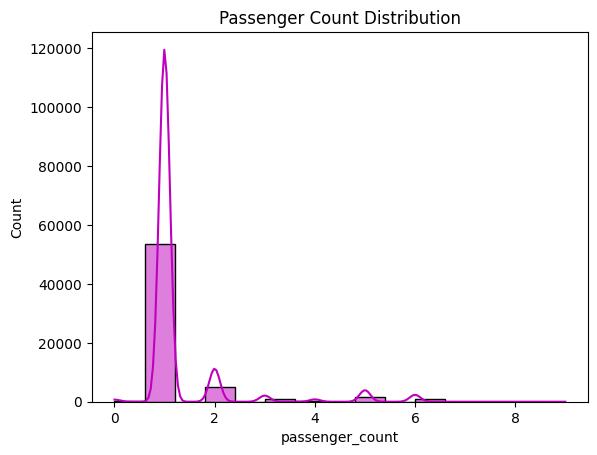

In [33]:
sns.histplot(df['passenger_count'],bins=15,kde=True,color='m')
plt.title('Passenger Count Distribution')
plt.show()

insight:
- terdapat nilai 0 pada passenger_count yang seharusnya tidak mungkin terjadi
- data tersebar secara tidak normal(distribusi tidak normal)

In [34]:
# Ubah nilai 0 ke missing values
df['passenger_count'] = df['passenger_count'].replace(0, np.nan)

In [35]:
#median
df['passenger_count'].fillna(df['passenger_count'].median(), inplace=True)

C:\Users\ghais\AppData\Local\Temp\ipykernel_20352\423616798.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['passenger_count'].fillna(df['passenger_count'].median(), inplace=True)


In [36]:
#cek
print(df['passenger_count'].value_counts())
print('Total missing values: ', df['passenger_count'].isna().sum())

passenger_count
1.0    58335
2.0     5049
5.0     1763
6.0     1050
3.0      943
4.0      360
7.0        3
8.0        2
9.0        1
Name: count, dtype: int64
Total missing values:  0


### MV Payment_type

`payment_type` merupakan missing value berbentuk MAR dimana berkaitan dengan kolom lain yaitu `tip_amount`<br>
akan dilakukan mengisi nilai missing values untuk kolom `payment_type`:

untuk kolom `payment_type` berkaitan dengan kolom `tip_amount` karena tip>0 menggunakan pembayaran credit card, jika pake cash maka tip tidak masuk ke data. Maka dapat disimpulkan bahwa
- Jika `tip_amount` > 0 maka `payment_type` = 1 Credit Card
- Jika `tip_amount` = 0 maka `payment_type` = 5 Unknown 

In [37]:
df.loc[df['payment_type'].isna(), ['tip_amount', 'payment_type']]

,tip_amount,payment_type
63887,7.41,NaN
63888,3.11,NaN
63889,6.63,NaN
63890,0.00,NaN
63891,4.68,NaN
...,...,...
68206,0.00,NaN
68207,0.00,NaN
68208,3.51,NaN
68209,3.20,NaN


In [38]:
df.loc[df['payment_type'].isna(), 'payment_type'] = df['tip_amount'].apply(lambda x: 1 if x > 0.0 else 5)

#cek 
print(df['payment_type'].value_counts())
print("Nilai missing values:", df['payment_type'].isna().sum())

payment_type
1.0    44084
2.0    22378
5.0      492
3.0      460
4.0       92
Name: count, dtype: int64
Nilai missing values: 0


### MV Trip_type

Trip_type berkorelasi kuat dengan Ratecode ID, sehingga trip_type merupakan missing value yang nilainya berbentuk MAR

In [39]:
#melihat nilai trip_type pada RatecodeID
df.groupby(['RatecodeID', 'trip_type']).agg(total=('trip_type', 'count'))

total
RatecodeID trip_type       
1.0        1.0        61726
           2.0            6
2.0        1.0          156
3.0        1.0           30
4.0        1.0            3
5.0        1.0          131
           2.0         1141

In [40]:
#melihat nilai missing values trip_type pada RatecodeID
df[df['trip_type'].isna()].groupby('RatecodeID').agg(total=('RatecodeID', 'count'))

,total
RatecodeID,
1.0,4264
2.0,45
3.0,4


In [41]:
df['trip_type'].fillna(1, inplace=True)

print(df['trip_type'].value_counts())
print('total missing values: ',df['trip_type'].isna().sum())

trip_type
1.0    66359
2.0     1147
Name: count, dtype: int64
total missing values:  0


C:\Users\ghais\AppData\Local\Temp\ipykernel_20352\2454135301.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['trip_type'].fillna(1, inplace=True)


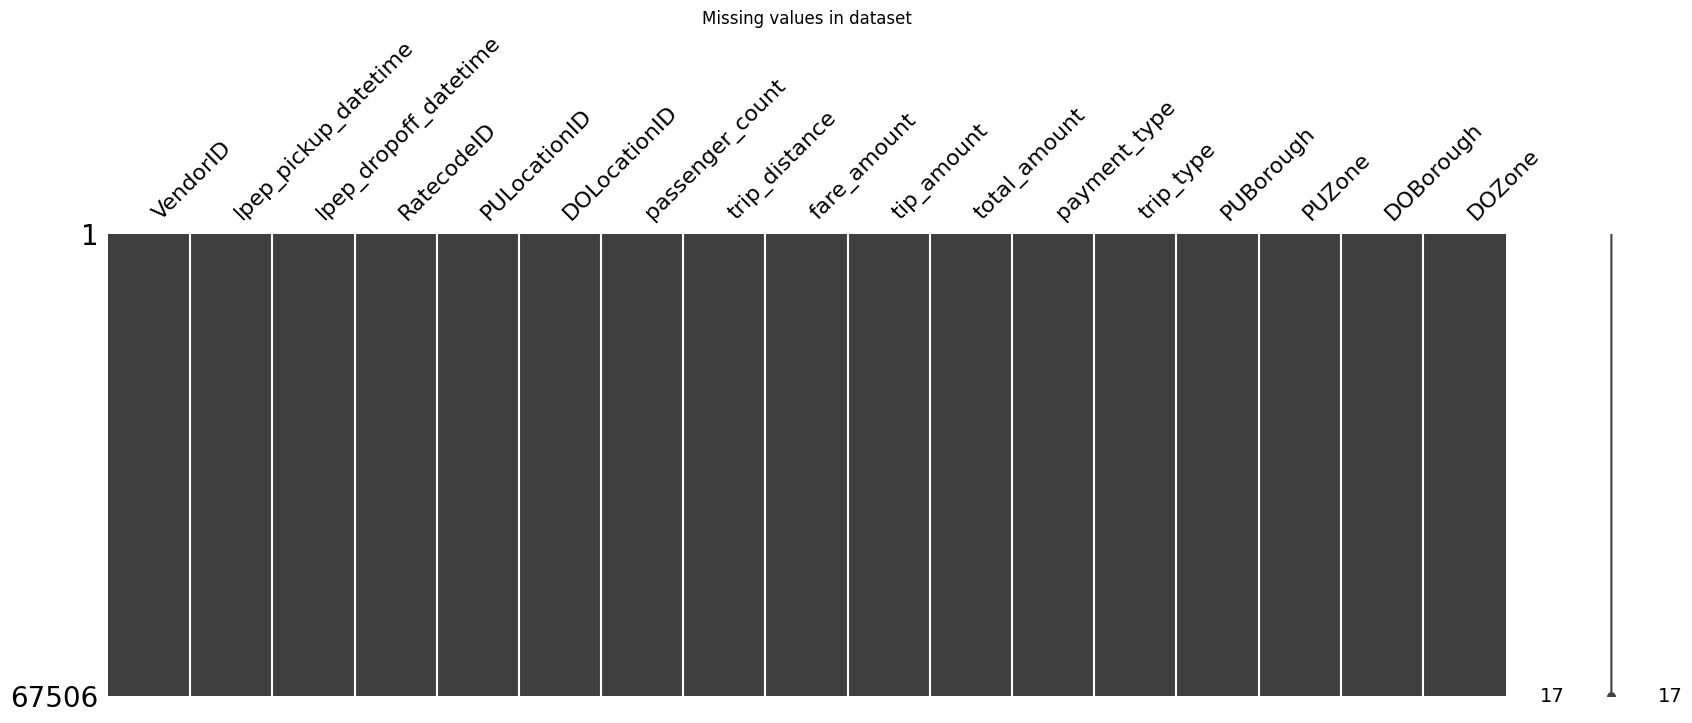

In [42]:
msno.matrix(df, figsize=(20, 6))
plt.title('Missing values in dataset')
plt.show()

bedasarkan informasi diatas, mostly nilai untuk `RatecodeID`= 1, 2, 3 adalah `trip_type`=1 <br>
maka dapat diputuskan missing value dapat diisi dengan 1

## 3.3 Outlier

In [43]:
display(df.describe(), df.describe(include='object'))

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,total_amount,payment_type,trip_type
count,67506.000000,67506,67506,67506.000000,67506.000000,67506.000000,67506.000000,67506.000000,67506.000000,67506.000000,67506.000000,67506.000000,67506.000000
mean,1.863805,2023-01-16 20:17:04.972861696,2023-01-16 20:35:07.410556160,1.079489,97.949634,137.234468,1.301558,8.148810,16.413153,2.133978,21.602455,1.378366,1.016991
min,1.000000,2009-01-01 20:21:27,2009-01-02 11:07:31,1.000000,3.000000,1.000000,1.000000,0.000000,-70.000000,-10.500000,-71.500000,1.000000,1.000000
25%,2.000000,2023-01-09 12:17:09.500000,2023-01-09 12:34:29.500000,1.000000,74.000000,74.000000,1.000000,1.130000,9.300000,0.000000,12.900000,1.000000,1.000000
50%,2.000000,2023-01-17 08:44:35.500000,2023-01-17 08:59:47,1.000000,75.000000,138.000000,1.000000,1.850000,13.320000,1.600000,17.870000,1.000000,1.000000
75%,2.000000,2023-01-24 15:54:16,2023-01-24 16:10:54.750000128,1.000000,129.000000,216.000000,1.000000,3.200000,19.800000,3.330000,26.040000,2.000000,1.000000
max,2.000000,2023-02-01 03:10:05,2023-02-01 17:27:05,5.000000,263.000000,265.000000,9.000000,120098.840000,490.000000,222.220000,491.000000,5.000000,2.000000
std,0.342998,NaN,NaN,0.548236,60.579526,76.100577,0.947868,588.152576,12.773036,2.983440,14.786192,0.586920,0.129239


,PUBorough,PUZone,DOBorough,DOZone
count,67506,67506,67506,67506
unique,5,221,6,247
top,Manhattan,East Harlem North,Manhattan,East Harlem South
freq,39314,13224,39616,3524


insight Outlier/anomaly di variabel kuantitatif:
- date terdapat nilai min yaitu pada tahun 2009 padahal data termasuk dalam 2023
- passanger_count terdapat nilai max=9 yang dimana seharusnya tidak mungkin terjadi
- Trip_distance yang jaraknya untuk max tidak masuk akal/outlier
- amount menghasilkan nilai min yaitu mines yang dimana seharusnya tidak mines


### Outlier datetime 

Jika dilihat dari website : https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page <br>
Bahwa NYC TLC melakukan record data setiap bulannya, maka dapat disimpulkan bahwa data ini untuk tahun 2023 pada bulan januari. selain bulan Januari 2023 adalah outlier

<function matplotlib.pyplot.show(close=None, block=None)>

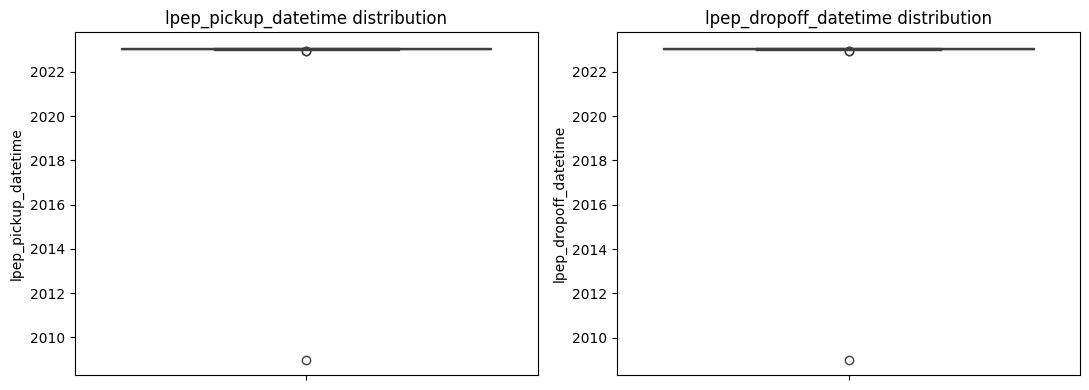

In [44]:
plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
sns.boxplot(df['lpep_pickup_datetime'])
plt.title('lpep_pickup_datetime distribution')
plt.subplot(1,2,2)
sns.boxplot(df['lpep_dropoff_datetime'])
plt.title('lpep_dropoff_datetime distribution')
plt.tight_layout()
plt.show

In [45]:
df[(df['lpep_pickup_datetime'].dt.month!=1) | (df['lpep_pickup_datetime'].dt.year!=2023)]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,total_amount,payment_type,trip_type,PUBorough,PUZone,DOBorough,DOZone
298,2,2022-12-09 14:10:49,2022-12-09 14:22:26,1.0,7,56,1.0,5.37,16.0,0.00,16.80,2.0,1.0,Queens,Astoria,Queens,Corona
318,2,2022-12-09 14:55:42,2022-12-09 15:33:06,1.0,260,164,1.0,5.48,25.5,0.00,35.60,2.0,1.0,Queens,Woodside,Manhattan,Midtown South
17874,2,2009-01-01 20:21:27,2009-01-02 11:07:31,1.0,65,178,1.0,7.72,34.5,7.20,43.20,1.0,1.0,Brooklyn,Downtown Brooklyn/MetroTech,Brooklyn,Ocean Parkway South
25100,2,2023-02-01 03:10:05,2023-02-01 03:40:35,5.0,82,198,2.0,4.58,28.0,5.66,33.96,1.0,2.0,Queens,Elmhurst,Queens,Ridgewood


In [46]:
df.drop(df[(df['lpep_pickup_datetime'].dt.month!=1) | (df['lpep_pickup_datetime'].dt.year!=2023)].index,inplace=True)
df[(df['lpep_pickup_datetime'].dt.month!=1) | (df['lpep_pickup_datetime'].dt.year!=2023)]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,total_amount,payment_type,trip_type,PUBorough,PUZone,DOBorough,DOZone


### Outlier passanger_count

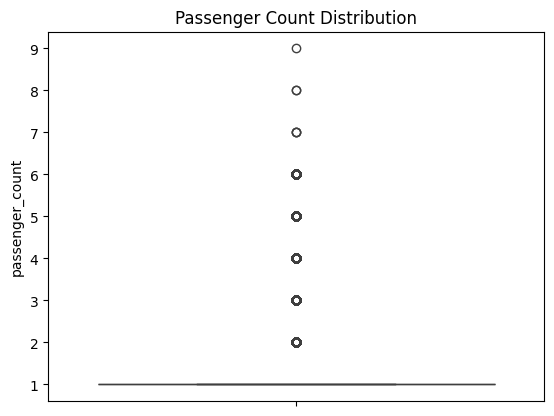

In [47]:
sns.boxplot(df['passenger_count'])
plt.title('Passenger Count Distribution')
plt.show()

Berdasarkan website https://www.nyc.gov/site/tlc/passengers/passenger-frequently-asked-questions.page

Jumlah penumpang maksimum yang diizinkan dalam taksi kuning menurut undang-undang adalah empat (4) orang dalam taksi empat (4) penumpang atau lima (5) orang dalam taksi lima (5) penumpang. Semua penumpang harus mengenakan sabuk pengaman dan anak-anak berusia di bawah 4 tahun harus duduk di kursi pengaman anak. Anak-anak berusia di bawah 8 tahun harus duduk di sistem pengaman anak, seperti sabuk pengaman, rompi, atau kursi pendorong yang disetujui pemerintah federal.

In [48]:
df['passenger_count'] = df['passenger_count'].apply(lambda x: '>5' if x > 5 else str(x))
df['passenger_count'].value_counts()

passenger_count
1.0    58332
2.0     5048
5.0     1763
>5      1056
3.0      943
4.0      360
Name: count, dtype: int64

### Outlier tip_amount

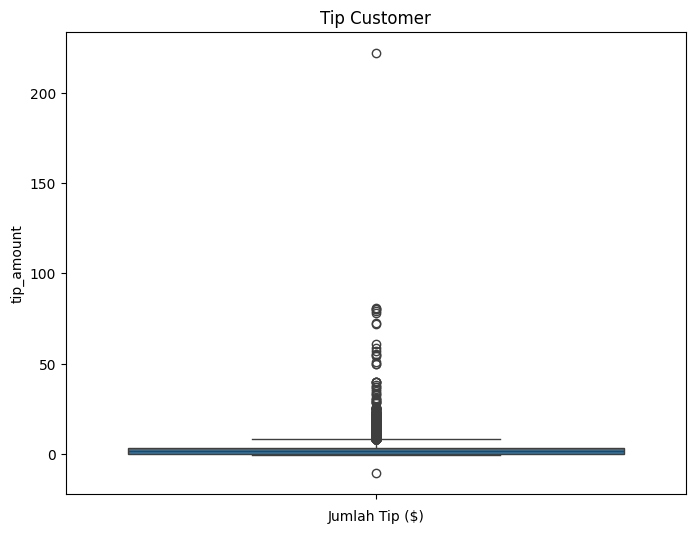

In [49]:
plt.figure(figsize=(8, 6))
sns.boxplot(df['tip_amount'])

plt.title('Tip Customer')
plt.xlabel('Jumlah Tip ($)')
plt.show()

In [50]:
df.drop(df[df['tip_amount']>200].index,axis=0,inplace=True)

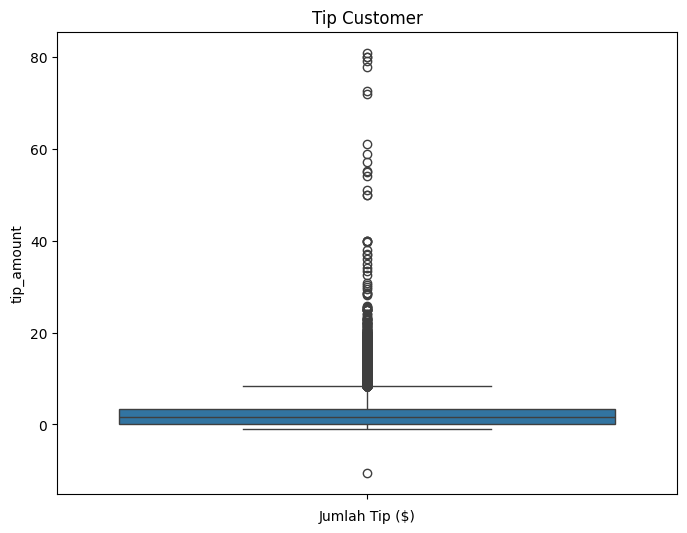

In [51]:
plt.figure(figsize=(8, 6))
sns.boxplot(df['tip_amount'])

plt.title('Tip Customer')
plt.xlabel('Jumlah Tip ($)')
plt.show()

### Outlier Jarak : Trip Distance

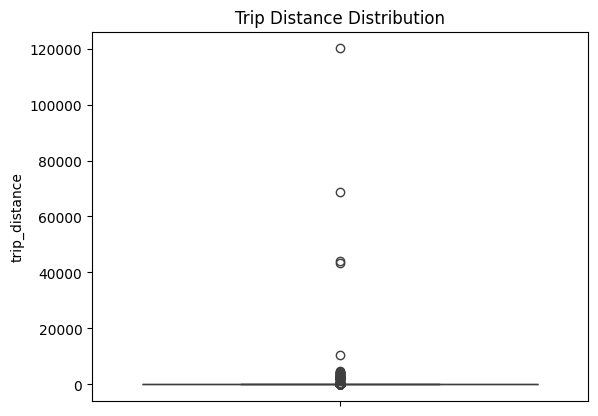

In [52]:
sns.boxplot(df['trip_distance'])
plt.title('Trip Distance Distribution')
plt.show()

insight :
- banyak nilai 0 yang merupakan outlier, seharusnya ada jarak perjalanan yang harus ditempuh minimal 0.1 mili maka 0 merupakan record yang seharusnya tidak terjadi, akan di drop
- akan diambil jarak yang masuk akal yaitu nilai <50 yang didapat jarak terjauh antara queens dan ewr, sehingga jika nilai >50 merupakan outlier akan di isi dengan nilai median/ratarata distance wilayah tersebut

In [53]:
print('total data 0 :', len(df[df['trip_distance']==0]))

total data 0 : 2992


In [54]:
df = df[df['trip_distance']>0]

In [55]:
print('data outlier:',len(df[df['trip_distance']>50]))

data outlier: 38


In [56]:
outlier=df.loc[df['trip_distance']>50,['PUBorough', 'DOBorough', 'trip_distance']]
outlier

,PUBorough,DOBorough,trip_distance
7322,Queens,Queens,66.18
33373,Queens,Manhattan,1571.97
63995,Brooklyn,Manhattan,579.63
64446,Queens,Manhattan,2555.47
64558,Brooklyn,Brooklyn,3077.89
64572,Queens,Queens,2606.52
64609,Manhattan,Manhattan,43392.12
64695,Queens,Queens,137.95
64947,Brooklyn,Manhattan,2446.53
64954,Bronx,Bronx,2027.31


In [57]:
id_distance_for_outlier = df[df['trip_distance']<50].groupby(['PUBorough', 'DOBorough']).agg(mean=('trip_distance', 'mean'),
                                                                                            median=('trip_distance', 'median')).reset_index()
id_distance_for_outlier

,PUBorough,DOBorough,mean,median
0,Bronx,Bronx,2.728084,2.210
1,Bronx,Brooklyn,20.015000,18.175
2,Bronx,Manhattan,4.929331,3.390
3,Bronx,Queens,12.287600,10.360
4,Brooklyn,Bronx,14.314667,13.830
5,Brooklyn,Brooklyn,2.480122,1.900
6,Brooklyn,EWR,14.750000,14.945
7,Brooklyn,Manhattan,5.964590,5.635
8,Brooklyn,Queens,9.319205,9.505
9,Brooklyn,Staten Island,14.200000,14.200


In [58]:
new_distance_for_outlier = pd.merge(outlier, id_distance_for_outlier, on=['PUBorough', 'DOBorough'], how='left')
new_distance_for_outlier

,PUBorough,DOBorough,trip_distance,mean,median
0,Queens,Queens,66.18,2.528696,1.860
1,Queens,Manhattan,1571.97,6.599735,5.740
2,Brooklyn,Manhattan,579.63,5.964590,5.635
3,Queens,Manhattan,2555.47,6.599735,5.740
4,Brooklyn,Brooklyn,3077.89,2.480122,1.900
5,Queens,Queens,2606.52,2.528696,1.860
6,Manhattan,Manhattan,43392.12,2.198307,1.720
7,Queens,Queens,137.95,2.528696,1.860
8,Brooklyn,Manhattan,2446.53,5.964590,5.635
9,Bronx,Bronx,2027.31,2.728084,2.210


karena hampir semua elemen bernilai mean!=median atau persebarannya tidak mendekati distribusi normal, maka median yang akan digunakan

In [59]:
new_distance_for_outlier.index = outlier.index

df.loc[outlier.index, 'trip_distance'] = new_distance_for_outlier['median']
df.loc[outlier.index][['PULocationID', 'DOLocationID', 'trip_distance']]

,PULocationID,DOLocationID,trip_distance
7322,134,134,1.860
33373,82,236,5.740
63995,181,137,5.635
64446,193,140,5.740
64558,49,65,1.900
64572,193,193,1.860
64609,41,74,1.720
64695,82,130,1.860
64947,52,79,5.635
64954,119,20,2.210


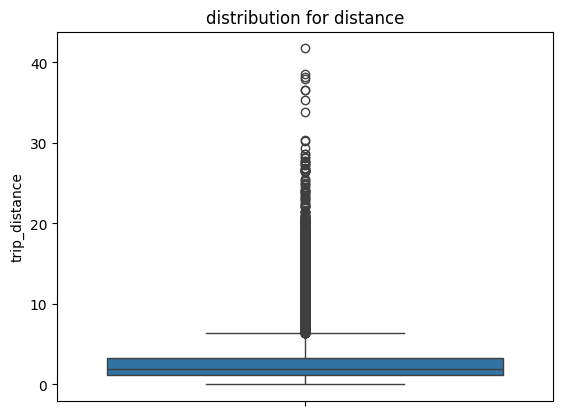

In [60]:
#cek
sns.boxplot(df['trip_distance'])
plt.title('distribution for distance')
plt.show()

### Outlier Amount

In [61]:
df[['fare_amount','tip_amount','total_amount']].describe()

,fare_amount,tip_amount,total_amount
count,64509.000000,64509.000000,64509.000000
mean,16.256607,2.186466,21.535269
std,11.785855,2.848013,13.950746
min,-70.000000,0.000000,-71.500000
25%,9.300000,0.000000,12.950000
50%,12.800000,1.800000,17.810000
75%,19.100000,3.410000,25.980000
max,455.000000,80.880000,456.000000


#### mengatasi nilai < 0 (nilai negatif)
mengatasi nilai < 0 (nilai negatif) dengan mengubah nilai menjadi positif pada features `fare_amount`

In [62]:
negatif_value  = df[df['fare_amount']<0]
df.loc[negatif_value.index, 'fare_amount'] = df['fare_amount'].abs()

In [63]:
df.loc[(df['fare_amount']<0), 'fare_amount'].unique()

array([], dtype=float64)

mengatasi nilai < 0 (nilai negatif) dengan mengubah nilai menjadi positif pada features `total_amount`

In [64]:
negatif_value  = df[df['total_amount']<0]
df.loc[negatif_value.index, 'total_amount'] = df['total_amount'].abs()

In [65]:
df.loc[(df['total_amount']<0), 'total_amount'].unique()

array([], dtype=float64)

#### mengatasi nilai = 0 (nilai null)

mengatasi nilai = 0 (nilai null) untuk kolom `fare_amount`

In [66]:
df.loc[(df['fare_amount']==0), ['trip_distance','fare_amount','total_amount','PUBorough','DOBorough']]

,trip_distance,fare_amount,total_amount,PUBorough,DOBorough
21813,2.10,0.0,0.00,Queens,Queens
24094,0.10,0.0,12.00,Queens,Queens
30192,3.00,0.0,12.00,Queens,Queens
30232,2.34,0.0,1.50,Bronx,Bronx
30233,2.34,0.0,1.50,Bronx,Bronx
30247,0.17,0.0,1.50,Bronx,Bronx
30248,0.17,0.0,1.50,Bronx,Bronx
36900,24.14,0.0,4.25,Manhattan,Staten Island
36901,24.14,0.0,4.25,Manhattan,Staten Island
44826,3.30,0.0,0.00,Queens,Queens


In [67]:
df = df[df['fare_amount']>0]

mengatasi nilai = 0 (nilai null) untuk kolom `total_amount`

In [68]:
df.loc[(df['total_amount']==0)]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,total_amount,payment_type,trip_type,PUBorough,PUZone,DOBorough,DOZone


## 3.4 Anomali Values

#### Anomali for RatecodeID

Kolom yang tidak sesuai dengan nilai `RatecodeID`, maka akan diganti valuenya `RatecodeID`= 1 dengan asumsi bahwa semua transaksi normal/tidak ada negosiasi

##### RotecodeID=2

In [69]:
df.loc[(df['RatecodeID']==2),['RatecodeID','PUBorough','DOBorough']].value_counts()

RatecodeID  PUBorough  DOBorough
2.0         Manhattan  Queens       144
                       Manhattan     12
            Brooklyn   Brooklyn       7
            Queens     Queens         6
                       Manhattan      2
            Bronx      Queens         1
Name: count, dtype: int64

In [70]:
df.loc[(df['RatecodeID']==2) & (df['PUBorough']== 'Queens') & (df['DOBorough']=='Queens'),'RatecodeID']=1
df.loc[(df['RatecodeID']==2) & (df['PUBorough']== 'Manhattan') & (df['DOBorough']=='Manhattan'),'RatecodeID']=1
df.loc[(df['RatecodeID']==2) & (df['PUBorough']== 'Brooklyn') & (df['DOBorough']=='Brooklyn'),'RatecodeID']=1
df.loc[(df['RatecodeID']==2) & (df['PUBorough']== 'Bronx') & (df['DOBorough']=='Queens'),'RatecodeID']=1

df.loc[(df['RatecodeID']==2),['RatecodeID','PUBorough','DOBorough']].value_counts()

RatecodeID  PUBorough  DOBorough
2.0         Manhattan  Queens       144
            Queens     Manhattan      2
Name: count, dtype: int64

##### RotecodeID=3

In [71]:
df.loc[(df['RatecodeID']==3),['RatecodeID','PUBorough','DOBorough']].value_counts()

RatecodeID  PUBorough      DOBorough    
3.0         Manhattan      EWR              11
                           Manhattan         2
            Brooklyn       EWR               2
            Bronx          Bronx             1
            Brooklyn       Brooklyn          1
            Manhattan      Queens            1
            Queens         EWR               1
                           Queens            1
            Staten Island  Staten Island     1
Name: count, dtype: int64

In [72]:
#kolom yang tidak sesuai
df.loc[(df['RatecodeID']==3) & (df['DOBorough']!='EWR'),'RatecodeID']=1 

#cek
df.loc[(df['RatecodeID']==3),['RatecodeID','PUBorough','DOBorough']].value_counts()

RatecodeID  PUBorough  DOBorough
3.0         Manhattan  EWR          11
            Brooklyn   EWR           2
            Queens     EWR           1
Name: count, dtype: int64

##### RatecodeID=4

In [73]:
df[df['RatecodeID']==4][['PUBorough', 'DOBorough']].value_counts()

PUBorough  DOBorough
Manhattan  Manhattan    2
           EWR          1
Name: count, dtype: int64

In [74]:
df.loc[(df['RatecodeID']==4) & (df['DOBorough']!='EWR'),'RatecodeID']=1 
df.loc[(df['RatecodeID']==4) & (df['DOBorough']=='EWR'),'RatecodeID']=3

##### RatecodeID=5

In [75]:
df[df['RatecodeID']==5][['PUBorough', 'DOBorough']].value_counts()

PUBorough  DOBorough
Queens     Queens       380
Manhattan  Manhattan    141
Brooklyn   Brooklyn      86
Bronx      Bronx         66
Brooklyn   Queens        48
           Manhattan     45
Queens     Manhattan     44
Manhattan  Bronx         27
           Queens        12
Queens     Brooklyn      10
Manhattan  Brooklyn       5
Bronx      Manhattan      4
Brooklyn   EWR            4
Bronx      Queens         4
Queens     Bronx          2
           EWR            2
Name: count, dtype: int64

##### RatecodeID=1

In [76]:
df[df['RatecodeID']==1][['PUBorough', 'DOBorough']].value_counts()

PUBorough      DOBorough    
Manhattan      Manhattan        35895
Queens         Queens           14720
Brooklyn       Brooklyn          6324
               Manhattan         1543
Manhattan      Bronx             1411
Queens         Manhattan          860
Manhattan      Queens             734
Bronx          Bronx              527
Queens         Brooklyn           479
Brooklyn       Queens             394
Bronx          Manhattan          252
Manhattan      Brooklyn           218
Queens         Bronx               36
Bronx          Queens              21
Brooklyn       Bronx               15
Staten Island  Staten Island        8
Bronx          Brooklyn             6
Queens         EWR                  4
Brooklyn       EWR                  2
               Staten Island        1
Staten Island  Brooklyn             1
Name: count, dtype: int64

In [77]:
df.loc[(df['RatecodeID']==1) & (df['PUBorough']== 'Manhattan') & (df['DOZone']=='JFK Airport'),['RatecodeID']]=1
df.loc[(df['RatecodeID']==1) & (df['PUZone']== 'JFK Airport') & (df['DOBorough']=='Manhattan'),['RatecodeID']]=1
df.loc[(df['RatecodeID']==1) & (df['DOBorough']=='EWR'),['RatecodeID']]=3

df[df['RatecodeID']==1][['PUBorough', 'DOBorough']].value_counts()

PUBorough      DOBorough    
Manhattan      Manhattan        35895
Queens         Queens           14720
Brooklyn       Brooklyn          6324
               Manhattan         1543
Manhattan      Bronx             1411
Queens         Manhattan          860
Manhattan      Queens             734
Bronx          Bronx              527
Queens         Brooklyn           479
Brooklyn       Queens             394
Bronx          Manhattan          252
Manhattan      Brooklyn           218
Queens         Bronx               36
Bronx          Queens              21
Brooklyn       Bronx               15
Staten Island  Staten Island        8
Bronx          Brooklyn             6
Brooklyn       Staten Island        1
Staten Island  Brooklyn             1
Name: count, dtype: int64

## 3.5 Duplicated data

In [78]:
df.duplicated().sum()

np.int64(99)

In [79]:
df[df.duplicated()]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,total_amount,payment_type,trip_type,PUBorough,PUZone,DOBorough,DOZone
663,2,2023-01-01 14:58:13,2023-01-01 14:58:39,1.0,75,74,2.0,0.17,3.0,0.0,4.5,3.0,1.0,Manhattan,East Harlem South,Manhattan,East Harlem North
1318,2,2023-01-02 02:05:08,2023-01-02 02:12:57,1.0,129,82,1.0,0.64,8.6,0.0,11.1,3.0,1.0,Queens,Jackson Heights,Queens,Elmhurst
1687,2,2023-01-02 12:56:53,2023-01-02 13:00:10,1.0,75,75,1.0,0.77,4.5,0.0,5.3,4.0,1.0,Manhattan,East Harlem South,Manhattan,East Harlem South
1865,2,2023-01-02 13:51:33,2023-01-02 13:52:42,1.0,75,75,2.0,0.08,3.7,0.0,5.2,3.0,1.0,Manhattan,East Harlem South,Manhattan,East Harlem South
2482,2,2023-01-02 19:03:48,2023-01-02 19:04:24,1.0,130,130,1.0,0.11,3.0,0.0,4.5,3.0,1.0,Queens,Jamaica,Queens,Jamaica
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60963,2,2023-01-30 15:57:52,2023-01-30 16:00:00,1.0,41,41,1.0,0.37,4.4,0.0,8.4,4.0,1.0,Manhattan,Central Harlem,Manhattan,Central Harlem
61103,2,2023-01-30 17:17:09,2023-01-30 17:33:27,1.0,260,82,1.0,0.67,14.2,0.0,18.2,3.0,1.0,Queens,Woodside,Queens,Elmhurst
63359,2,2023-01-31 18:39:16,2023-01-31 18:39:29,1.0,130,130,3.0,0.05,3.0,0.0,7.0,4.0,1.0,Queens,Jamaica,Queens,Jamaica
63545,2,2023-01-31 19:06:18,2023-01-31 19:06:46,1.0,75,75,2.0,0.08,3.0,0.0,7.0,3.0,1.0,Manhattan,East Harlem South,Manhattan,East Harlem South


In [80]:
df.drop_duplicates(inplace= True)
df.duplicated().sum()

np.int64(0)

## 3.6 Generated Feature for analysis

### feature for Datetime

#### Category Day in Datetime

In [81]:
df['day']=df['lpep_pickup_datetime'].dt.day_name()
df['day_category'] = df['lpep_pickup_datetime'].dt.day_name().apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekdays')
df[['lpep_pickup_datetime','day','day_category']].head(5)

,lpep_pickup_datetime,day,day_category
0,2023-01-01 00:26:10,Sunday,Weekend
1,2023-01-01 00:51:03,Sunday,Weekend
3,2023-01-01 00:13:14,Sunday,Weekend
4,2023-01-01 00:33:04,Sunday,Weekend
5,2023-01-01 00:53:31,Sunday,Weekend


#### category Time in Datetime
https://kumparan.com/berita_viral/perbedaan-waktu-pagi-siang-sore-senja-petang-malam-dini-hari-dan-subuh-1yDy7XXywXI

- early morning : 00.00-04.59
- morning: 05.00-10.59 
- afternoon: 11.00-15.00 
- evening: 15.01-18.00
- night: 18.00-23.59


In [82]:
# Mengonversi waktu menjadi jumlah menit sejak tengah malam
df['category_time'] = df['lpep_pickup_datetime'].dt.hour * 60 + df['lpep_pickup_datetime'].dt.minute

# Mendefinisikan interval bins (dalam menit)
bins = [0, 300, 660, 900, 1080, 1440]  # 0-5 AM, 5-11 AM, 11 AM-3 PM, 3-6 PM, 6 PM-12 AM
labels = ['early morning', 'morning', 'afternoon', 'evening', 'night']

# Menggunakan pd.cut untuk mengelompokkan waktu ke dalam kategori berdasarkan interval bins
df['category_time'] = pd.cut(df['category_time'], bins=bins, labels=labels, right=False)
df['category_time'] = df['category_time']
# Tampilkan hasilnya
print(df[['lpep_pickup_datetime','category_time']].head())

  lpep_pickup_datetime  category_time
0  2023-01-01 00:26:10  early morning
1  2023-01-01 00:51:03  early morning
3  2023-01-01 00:13:14  early morning
4  2023-01-01 00:33:04  early morning
5  2023-01-01 00:53:31  early morning


### Feature for duration

In [83]:
diff = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).dt.total_seconds()/60
df['trip_duration'] = diff.round(2)

### Feature for tip category

<Axes: ylabel='tip_amount'>

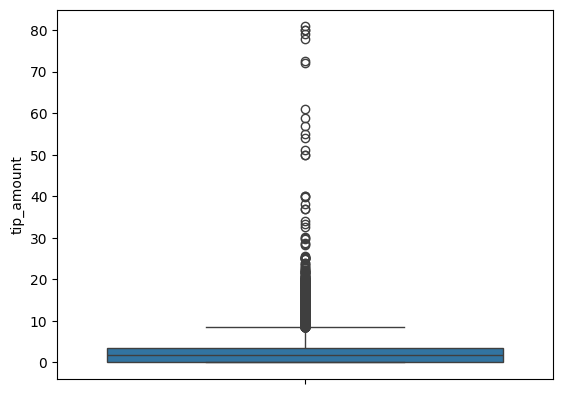

In [84]:
sns.boxplot(df['tip_amount'])

In [85]:
def categorytip(x):
    if x == 0:
        return "nol"
    elif 0<x<=5:
        return "low"
    elif 5<x<=10:
        return "medium"
    elif 10<x<=15:
        return "high"
    else:
        return "very high"

In [86]:
df['category_tip']=df['tip_amount'].apply(categorytip)
df['category_tip']

0        low
1        low
3        low
4        nol
5        nol
        ... 
68206    nol
68207    nol
68208    low
68209    low
68210    low
Name: category_tip, Length: 64393, dtype: object

## 3.7 Generated values

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64393 entries, 0 to 68210
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               64393 non-null  int64         
 1   lpep_pickup_datetime   64393 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  64393 non-null  datetime64[ns]
 3   RatecodeID             64393 non-null  float64       
 4   PULocationID           64393 non-null  int64         
 5   DOLocationID           64393 non-null  int64         
 6   passenger_count        64393 non-null  object        
 7   trip_distance          64393 non-null  float64       
 8   fare_amount            64393 non-null  float64       
 9   tip_amount             64393 non-null  float64       
 10  total_amount           64393 non-null  float64       
 11  payment_type           64393 non-null  float64       
 12  trip_type              64393 non-null  float64       
 13  PUBoro

### VendorID

In [88]:
df['VendorID']= df['VendorID'].replace({1:'CreativeMobileTechnologies,LLC.',2:'VeriFoneInc'})
df['VendorID'].value_counts()

VendorID
VeriFoneInc                        56653
CreativeMobileTechnologies,LLC.     7740
Name: count, dtype: int64

### RatecodeID

In [89]:
df['RatecodeID'] = df['RatecodeID'].replace({1:'Standard rate', 2:'JFK Airport', 3:'Newark Airport', 4:'Nassau or Westchester', 5:'Negotiated fare', 6:'Group ride'})
df['RatecodeID'].value_counts()

RatecodeID
Standard rate      63349
Negotiated fare      877
JFK Airport          146
Newark Airport        21
Name: count, dtype: int64

### payment_types

In [90]:
df['payment_type']=df['payment_type'].replace({1:'Credit card', 2:'Cash', 3:'No charge', 4:'Dispute', 5:'Unknown', 6:'Voided trip'})
df['payment_type'].value_counts()

payment_type
Credit card    41996
Cash           21689
Unknown          438
No charge        221
Dispute           49
Name: count, dtype: int64

### trip_type

In [91]:
df['trip_type']=df['trip_type'].replace({1:'Street-hail', 2:'Dispatch'})
df['trip_type'].value_counts()

trip_type
Street-hail    63625
Dispatch         768
Name: count, dtype: int64

In [92]:
df.to_csv('NYC_TLC_clean.csv',index=False)

# Section 4. EDA

## Question 1: Analisis demand Permintaan Berdasarkan Waktu dan Lokasi

**Problem statement:**<br>
Permintaan taksi di New York City demand sepanjang hari dan minggu. Faktor-faktor seperti jam sibuk dan akhir pekan dapat menyebabkan lonjakan permintaan. Selain itu, permintaan di berbagai lokasi (misalnya, di pusat kota atau bandara) juga sangat berbeda. Hal ini dapat menyebabkan ketidakseimbangan antara pasokan kendaraan dan permintaan, yang dapat meningkatkan waktu tunggu penumpang.

1. Bagaimana demand permintaan taksi di NYC sepanjang hari?
1. Apa yang mempengaruhi permintaan taksi pada hari-hari tertentu dalam minggu?
1. Apakah permintaan lebih tinggi pada akhir pekan dibandingkan hari biasa?
1. Bagaimana permintaan taksi berbeda di berbagai lokasi?
1. Di mana permintaan tertinggi untuk taksi berdasarkan zona penjemputan dan pengantaran?


### Demand berdasarkan waktu (jam)

In [93]:
df['pickup_hour']  = df['lpep_pickup_datetime'] .dt.hour
df['day'] = df['lpep_pickup_datetime'] .dt.day_name()

# Analisis jumlah perjalanan per jam
df.groupby('pickup_hour')['RatecodeID'].count().reset_index()


,pickup_hour,RatecodeID
0,0,1049
1,1,823
2,2,587
3,3,523
4,4,394
5,5,376
6,6,913
7,7,2496
8,8,3050
9,9,3327


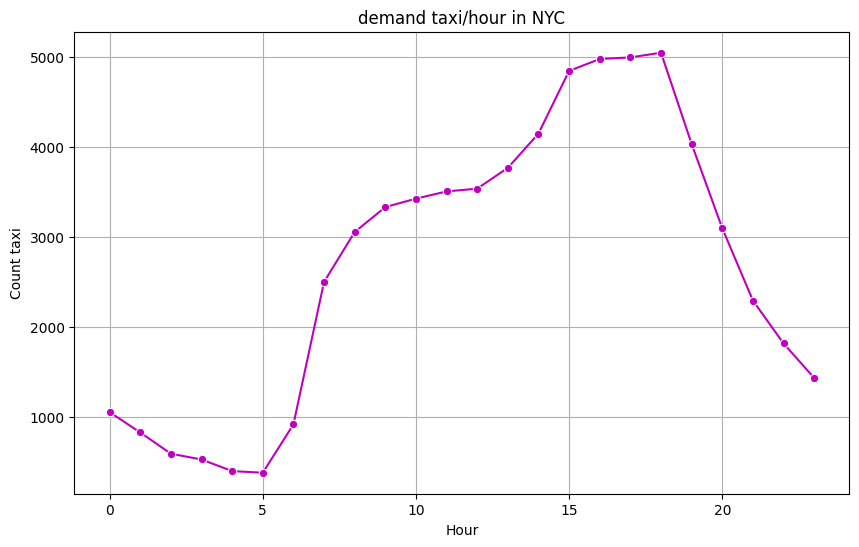

In [94]:
# Visualisasi permintaan per jam
plt.figure(figsize=(10,6))
sns.lineplot(x='pickup_hour', y='RatecodeID', data=df.groupby('pickup_hour')['RatecodeID'].count().reset_index(),marker='o',color='m')
plt.title('demand taxi/hour in NYC')
plt.xlabel('Hour')
plt.ylabel('Count taxi')
plt.grid()
plt.show()

Insight:
- Jika dilihat bahwa puncak taksi ramai terjadi pada sore hari yaitu jam 15.00-20.00, ini bisa terjadi karena banyak orang yang bekerja di kantor dan membutuhkan transportasi untuk pulang ke rumah

### Demand berdasarkan tanggal

In [95]:
df['pickup_date']  = df['lpep_pickup_datetime'] .dt.date
df['day'] = df['lpep_pickup_datetime'] .dt.day_name()

# Analisis jumlah perjalanan per jam
df.groupby('pickup_date')['RatecodeID'].count().reset_index()

,pickup_date,RatecodeID
0,2023-01-01,1383
1,2023-01-02,1479
2,2023-01-03,1995
3,2023-01-04,2240
4,2023-01-05,2282
5,2023-01-06,2407
6,2023-01-07,2030
7,2023-01-08,1557
8,2023-01-09,2074
9,2023-01-10,2047


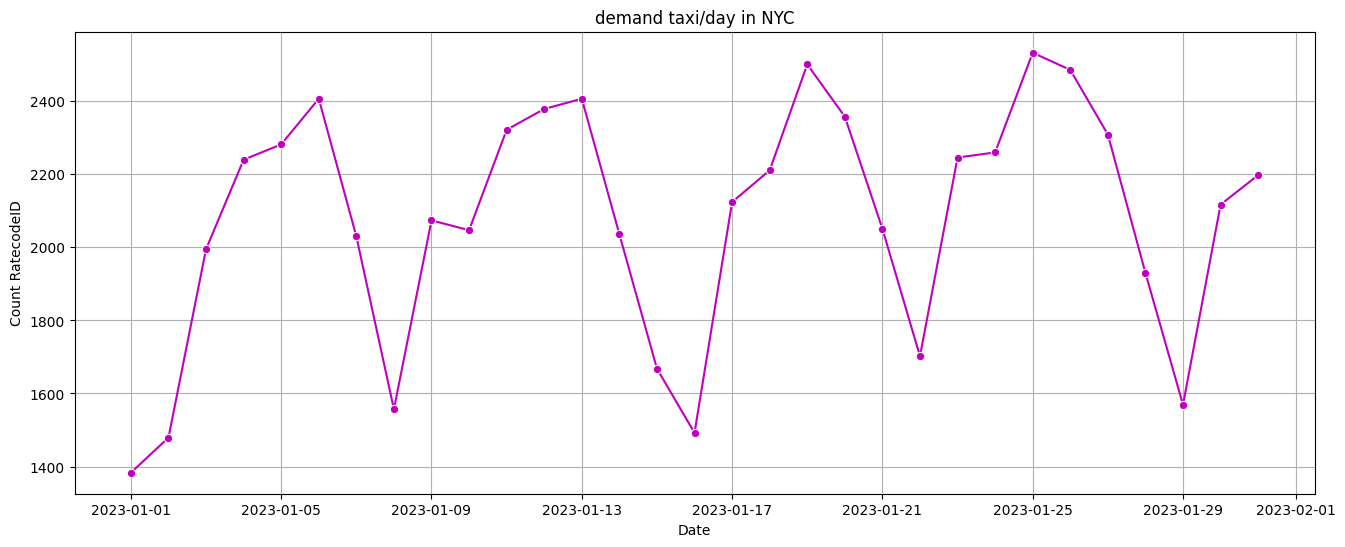

In [96]:
# Visualisasi permintaan per jam
plt.figure(figsize=(16,6))
sns.lineplot(x='pickup_date', y='RatecodeID', data=df.groupby('pickup_date')['RatecodeID'].count().reset_index(), marker='o',color='m')
plt.title('demand taxi/day in NYC')
plt.xlabel('Date')
plt.ylabel('Count RatecodeID')

plt.grid()
plt.show()

Insight:
- jika dilihat dari grafik tersebut bahwa ada pola berulang setiap minggunya. ada penurunan yang cukup drastis setiap minggunya, hal ini bisa dilakukan analisis apa yang terjadi?

### Demand berdasarkan hari

C:\Users\ghais\AppData\Local\Temp\ipykernel_20352\1874867851.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day', y='count', data=daily_demand, palette='husl')


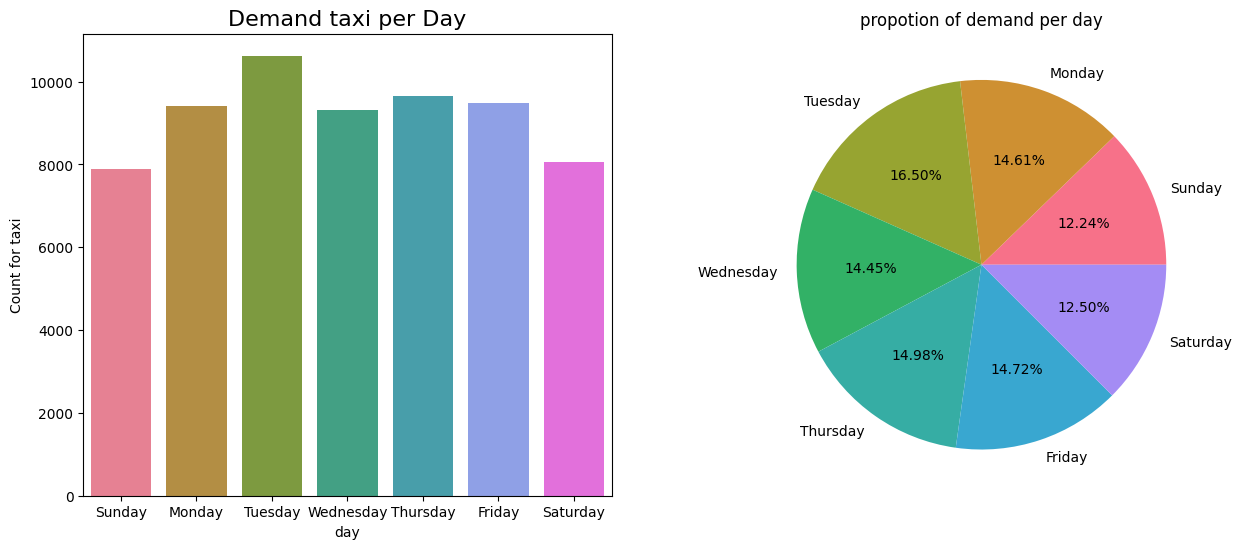

In [97]:

daily_demand = df.groupby('day').agg(count=('RatecodeID', 'count')).reset_index()

# Menyusun urutan hari (Senin sampai Minggu)
ordered_days = ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
daily_demand['day'] = pd.Categorical(daily_demand['day'], categories=ordered_days, ordered=True)
daily_demand = daily_demand.sort_values('day')

# Visualisasi permintaan per hari
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(x='day', y='count', data=daily_demand, palette='husl')

# Menambahkan judul dan label
plt.title('Demand taxi per Day', fontsize=16)
plt.xlabel('day')
plt.ylabel('Count for taxi')

plt.subplot(1,2,2)
plt.pie(x=daily_demand['count'], labels=ordered_days, autopct='%1.2f%%',colors=sns.color_palette("husl", 8))
plt.title('propotion of demand per day')

# Menampilkan plot
plt.show()

insight: <br>
- dari pola line chart yang berulang, didapat bahwa setiap hari sabtu dan minggu mengalami penurunan atau orang cendurung tidak menggunakan taksi
- puncak orang menggunakan taksi yaitu pada hari selasa yaitu sebesar 16.50%.

### Demand berdasarkan category hari

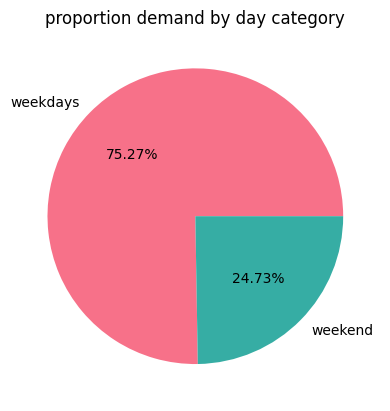

In [98]:
cattime_demand = df.groupby('day_category').agg(count=('RatecodeID', 'count')).reset_index()

plt.pie(x=cattime_demand['count'], labels=['weekdays','weekend'],autopct='%1.2f%%', colors=sns.color_palette("husl", 2))
plt.title('proportion demand by day category')
plt.show()

insight : 
- dilihat dari proporsi pie chartnya bahwa orang yang menggunakan taksi di hari weekend hanya sedikit dibandingkan weekdays, hal ini semakin memperkuat statement bahwa orang yang menggunakan taksi adalah orang yang memiliki aktivitas setiap harinya seperti sekolah, kerja, dan lain lain.

### Demand berdasarkan kategori waktu

In [99]:
cattime_demand = df.groupby('category_time').agg(count=('RatecodeID', 'count')).reset_index()
cattime_demand

C:\Users\ghais\AppData\Local\Temp\ipykernel_20352\525413958.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cattime_demand = df.groupby('category_time').agg(count=('RatecodeID', 'count')).reset_index()


,category_time,count
0,early morning,3376
1,morning,13583
2,afternoon,14940
3,evening,14802
4,night,17692


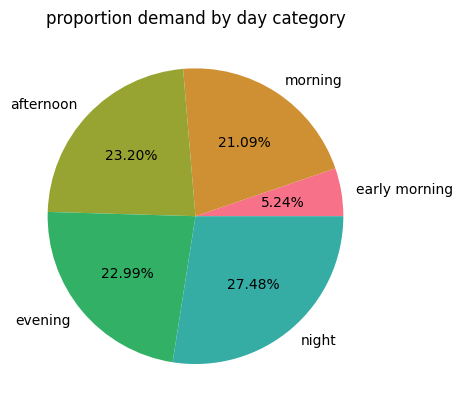

In [100]:
cattime=cattime_demand['category_time'].tolist()

plt.pie(x=cattime_demand['count'], labels=cattime,autopct='%1.2f%%', colors=sns.color_palette("husl", 8))
plt.title('proportion demand by day category')
plt.show()

insight :
- tetapi jika dilihat dari proporsi pada pie chart diasumsikan bahwa orang yang memiliki aktivitas atau bekerja selalu berangkat pagi dan pulang sore hingga malam. jika dilihat bahwa untuk orang yang naik taksi di pagi hari hanya sedikit dibandingkan dengan sore atau malam, hal ini bisa kita asumsikan bahwa orang lebih memilih menggunakan transportasi lain untuk berangkat kerja.

### Demand berdasarkan PUBorough

C:\Users\ghais\AppData\Local\Temp\ipykernel_20352\2986111117.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars=sns.barplot(x='PUBorough', y='count', data=location_demand, palette='husl')


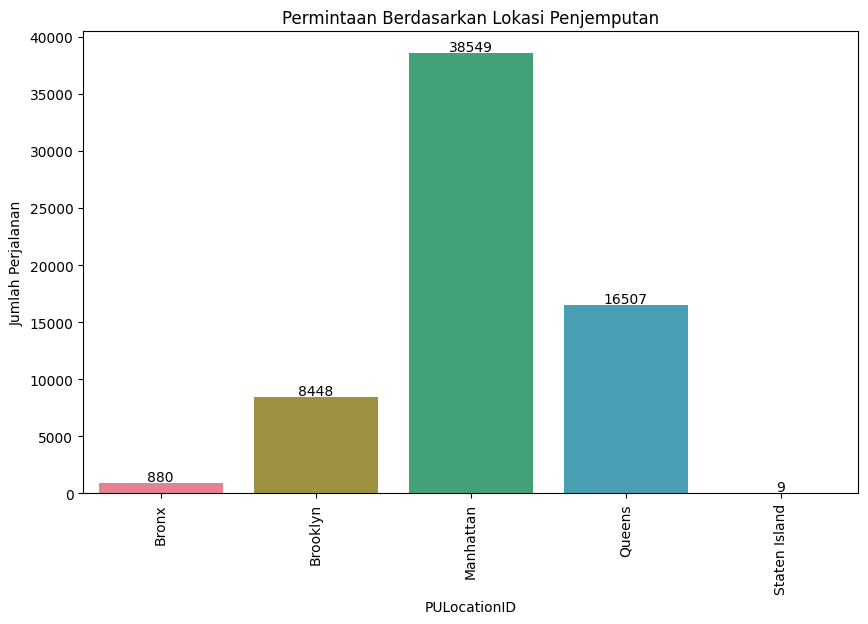

In [101]:
location_demand = df.groupby('PUBorough').agg(count=('RatecodeID', 'count')).reset_index()

# Visualisasi permintaan berdasarkan lokasi penjemputan
plt.figure(figsize=(10,6))
bars=sns.barplot(x='PUBorough', y='count', data=location_demand, palette='husl')
for idx, bar in enumerate(bars.patches):
    # Get X and Y placement of label from bar
    x_value = bar.get_x() + bar.get_width() / 2
    y_value = bar.get_height() + 200
    label = "{:.0f}".format(location_demand['count'].iloc[idx]) 
    plt.text(x_value, y_value, label, ha='center')

plt.title('Permintaan Berdasarkan Lokasi Penjemputan')
plt.xlabel('PULocationID')
plt.ylabel('Jumlah Perjalanan')

plt.xticks(rotation=90)
plt.show()

insight :
- pada gambar tersebut bahwa daerah paling rame menggunakan taksi yaitu manhattan, manhattan merupakan pusat ekonomi utama di NYC dan di dunia, serta tempat banyak perusahaan besar dan kantor pusat multinasional. maka dari itu tidak heran bahwa taksi di manhattan sangat ramai dan banyak digunakan oleh masyarakat.

### Insight keseluruhan

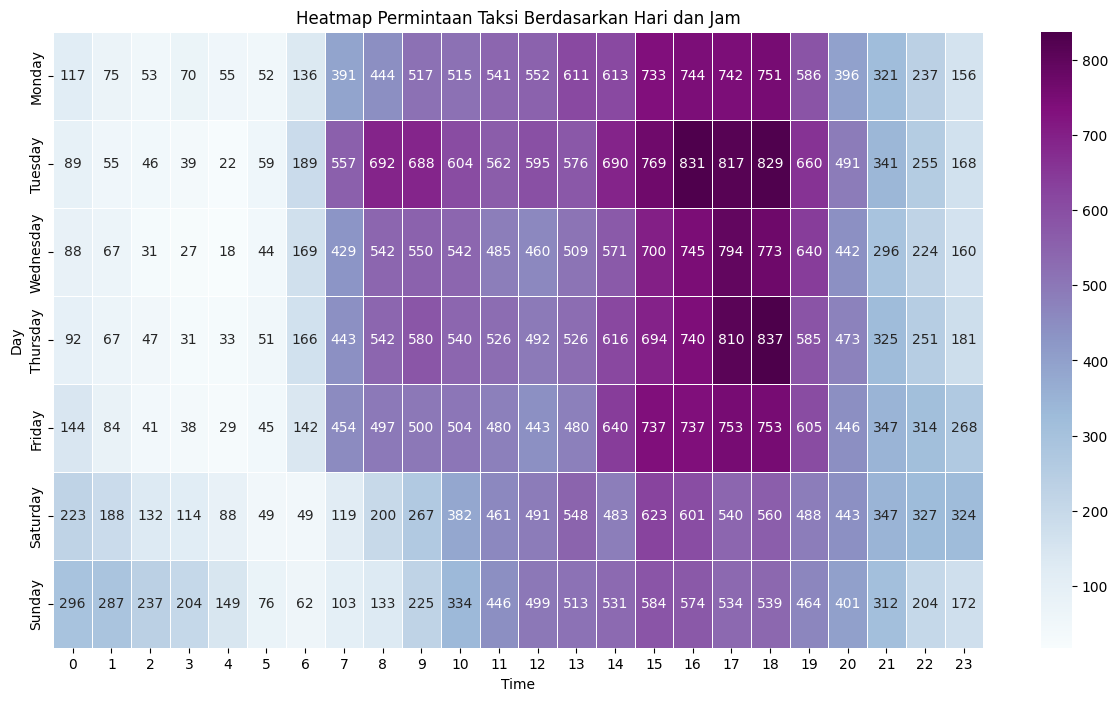

In [102]:
heatmap_data = df.groupby(['day', 'pickup_hour'])['RatecodeID'].count().unstack(fill_value=0)

# Menyusun urutan hari
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.loc[ordered_days]

# Visualisasi heatmap
plt.figure(figsize=(15,8))
sns.heatmap(heatmap_data, cmap="BuPu", annot=True, fmt='d', linewidths=0.5)
plt.title('Heatmap Permintaan Taksi Berdasarkan Hari dan Jam')
plt.xlabel('Time')
plt.ylabel('Day')
plt.show()

Permintaan taksi yang paling tinggi di New York City terjadi pada sore hingga malam hari di weekdays karena aktivitas sosial, seperti pulang kerja, dan perjalanan wisata. Selain itu, Manhattan menjadi lokasi paling ramai dalam hal penggunaan taksi karena merupakan pusat dari ekonomi, bisnis, dan wisata di kota ini. Dengan banyaknya orang yang bekerja, belajar, dan berwisata di Manhattan, taksi berfungsi sebagai transportasi yang sangat penting untuk menghubungkan orang-orang dengan tempat-tempat utama di kota.

### Rekomendasi
- **Optimalisasi Distribusi Kendaraan di Area dengan Permintaan Tinggi** dengan Fokuskan distribusi kendaraan lebih banyak ke Manhattan, terutama selama jam-jam sibuk sore hingga malam hari.
- **Penyesuaian Tarif Dinamis Berdasarkan Waktu dan Lokasi dengan menerapkan tarif dinamis yang lebih fleksibel pada jam sibuk sore dan malam hari.** Tarif yang lebih tinggi pada waktu puncak dapat membantu menyeimbangkan permintaan dan pasokan kendaraan, namun tarif ini harus tetap terjangkau untuk pelanggan agar tidak menyebabkan penurunan permintaan yang signifikan.

## Question 2 : Pengaruh Tarif Dinamis Terhadap Permintaan 

**Problem statement:** <br>
Sistem tarif dinamis yang digunakan oleh NYC TLC atau layanan ride-hailing dapat menyebabkan fluktuasi harga yang tidak selalu sesuai dengan permintaan. Tarif yang lebih tinggi selama jam sibuk atau event besar dapat menyebabkan penurunan permintaan, sementara tarif lebih rendah dapat meningkatkan jumlah pelanggan, tetapi dengan risiko pendapatan lebih rendah.

1. Bagaimana pengaruh tarif dinamis terhadap permintaan taksi di NYC?
1. Bagaimana cara menyesuaikan tarif dinamis untuk memastikan pendapatan maksimal tanpa merugikan permintaan?


### Tarif VS permintaan

In [103]:
fare_demand = df.groupby('fare_amount').agg(count=('RatecodeID', 'count')).reset_index()
fare_demand

,fare_amount,count
0,0.01,2
1,0.05,1
2,0.15,2
3,0.30,1
4,0.45,1
...,...,...
2371,348.10,1
2372,399.00,1
2373,425.00,1
2374,440.00,1


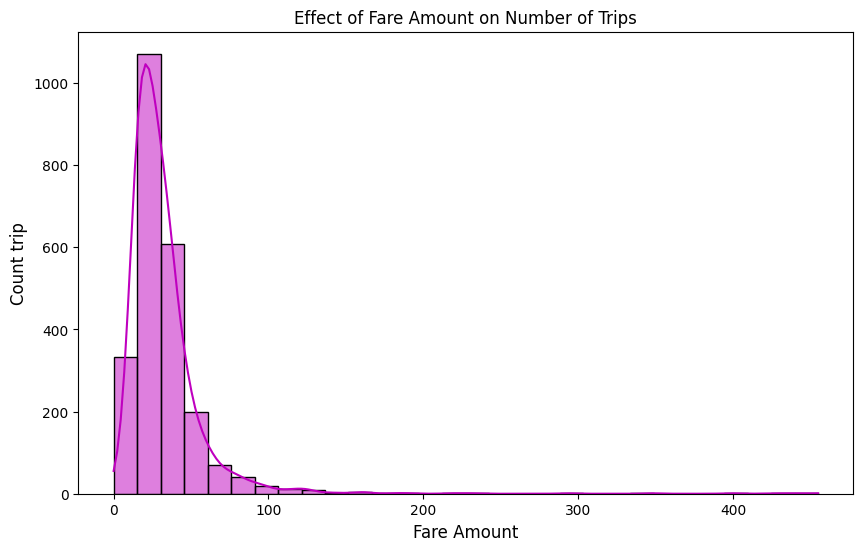

In [104]:
# Visualisasi hubungan antara fare_amount dan jumlah perjalanan
plt.figure(figsize=(10,6))
sns.histplot(fare_demand['fare_amount'], bins=30 , color='m',kde=True)

# Menambahkan judul dan label
plt.title('Effect of Fare Amount on Number of Trips')
plt.xlabel('Fare Amount', fontsize=12)
plt.ylabel('Count trip', fontsize=12)

# Menampilkan plot
plt.show()

scatter plot diatas menunjukkan **hubungan antara fare amount dan count trip**. dapat dilihat bahwa jika fare amount/harganya murah maka ada banyak orang yang memesan untuk melakukan trip. sedangkan jika harga semakin mahal, orang akan semakin sedikit yang memesan untuk melakukan trip. akan dibuktikan seberapa pengaruh dengan menggunakan persamaan regresi

In [105]:
df['RatecodeID'].unique()

array(['Standard rate', 'Negotiated fare', 'Newark Airport',
       'JFK Airport'], dtype=object)

In [106]:
def Ratecodeid (x):
    if "Standard rate" in x:
        return 1
    elif "JFK Airport" in x:
        return 2
    elif "Newark Airport" in x:
        return 3
    else:
        return 4

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df[['fare_amount']]
y = df['RatecodeID'].apply(Ratecodeid)


sns.regplot sama tidak usah dibagi train dan test
menggunakan stat model

In [108]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [109]:
# Memprediksi hasil pada test set
y_pred = model.predict(X)

# Menampilkan koefisien model
print(f'Koefisien regresi: {model.coef_}')

Koefisien regresi: [0.00530825]


- **Ini berarti bahwa setiap kenaikan $1 pada fare_amount (tarif perjalanan), jumlah perjalanan akan meningkat sebesar 0.0051**. Dalam konteks tarif dinamis, jika tarif naik, kita mengharapkan sedikit peningkatan dalam jumlah perjalanan, yang bertentangan dengan hipotesis awal bahwa tarif lebih tinggi cenderung mengurangi permintaan.


### Cek korelasi dari pendapatan

In [110]:
correlation = df[['fare_amount', 'tip_amount']].corr('spearman')

print(f'Korelasi antara fare_amount dan tip_amount: {correlation.loc["fare_amount", "tip_amount"]}')

Korelasi antara fare_amount dan tip_amount: 0.3072512242355987


C:\Users\ghais\AppData\Local\Temp\ipykernel_20352\745279138.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['category_tip'],y=df['fare_amount'], palette=sns.color_palette("husl", 5))


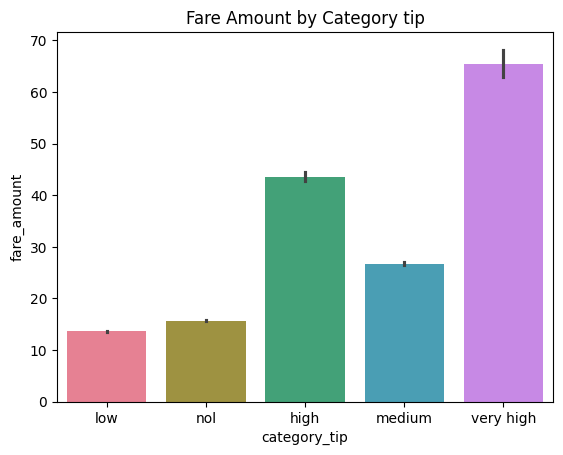

In [111]:
sns.barplot(x=df['category_tip'],y=df['fare_amount'], palette=sns.color_palette("husl", 5))
plt.title('Fare Amount by Category tip')
plt.show()

### insight secara keseluruhan :

**Pengaruh Harga terhadap Permintaan (Fare Amount):**<br>
- Berdasarkan scatter plot, kita melihat bahwa harga yang lebih rendah cenderung mendorong lebih banyak permintaan. Ini menunjukkan bahwa pelanggan lebih cenderung memesan taksi ketika harga terjangkau.
- Koefisien regresi 0.00517644 mengindikasikan bahwa setiap kenaikan tarif sebesar $1 akan menyebabkan peningkatan permintaan (jumlah perjalanan) sebesar 0.0052 perjalanan. Hal ini bisa menunjukkan bahwa peningkatan tarif tidak terlalu mengurangi jumlah perjalanan, tetapi ada kecenderungan bahwa harga lebih rendah lebih efektif dalam meningkatkan permintaan.

**Hubungan antara Fare Amount dan Tip Amount:**<br>
- Korelasi 0.31 antara fare_amount dan tip_amount menunjukkan adanya hubungan positif moderat antara tarif dan jumlah tip yang diberikan. Ini berarti bahwa semakin tinggi harga (fare_amount), semakin besar kemungkinan tip yang diberikan, meskipun hubungan ini tidak terlalu kuat (nilai korelasi yang lebih rendah menunjukkan hubungan yang lebih lemah).

### Rekomendasi:

**Strategi Penetapan Tarif:**
- Berdasarkan scatter plot dan koefisien regresi, menurunkan harga (fare_amount) dapat meningkatkan permintaan untuk layanan taksi. Oleh karena itu, strategi penetapan tarif dinamis yang lebih terjangkau pada waktu-waktu tertentu atau di area dengan permintaan rendah bisa sangat efektif untuk meningkatkan volume perjalanan. (bisa diberikan diskon atau promo untuk meningkatkan permintaan)

**Penyesuaian Tarif berdasarkan Waktu dan Lokasi:**
- Untuk jam sibuk, tarif bisa ditingkatkan sedikit, tetapi jangan terlalu mahal agar tidak mengurangi permintaan secara signifikan. Di area yang sangat padat (seperti pusat kota atau dekat dengan bandara), menggunakan tarif dinamis yang sedikit lebih tinggi bisa diterapkan, namun perlu diperhatikan bahwa kenaikan tarif yang signifikan bisa menyebabkan penurunan permintaan seperti yang ditunjukkan oleh grafik scatter plot.

**Meningkatkan Kepuasan Pelanggan melalui Tip:**
- Karena korelasi positif antara fare_amount dan tip_amount, bisa jadi peningkatan harga (fare) sedikit akan berhubungan dengan tip yang lebih besar. Oleh karena itu, menjaga transparansi harga dan memberikan layanan yang lebih baik selama perjalanan dapat meningkatkan kepuasan pelanggan dan mendorong pelanggan untuk memberikan tip lebih besar.
- Menyediakan pelayanan yang lebih baik, seperti kebersihan kendaraan dan kesopanan pengemudi, bisa membantu meningkatkan tip, terutama ketika harga lebih tinggi.

**Strategi Penetapan Harga Berdasarkan Lokasi:**
- Di area-area seperti bandara, tarif bisa sedikit lebih tinggi, tetapi tidak mengurangi peminat secara signifikan. Di area yang lebih sepi, tarif bisa ditingkatkan sedikit

## Question 3
**Problem statement:**
Sistem layanan taksi sering kali menghadapi masalah dalam memahami apa yang memotivasi pelanggan untuk memberikan tip yang lebih besar kepada pengemudi. Walaupun tip dapat bervariasi tergantung pada pelanggan, perjalanan, dan situasi lainnya, ada beberapa faktor yang perlu dianalisis lebih lanjut untuk mengetahui seberapa besar pengaruh faktor-faktor tersebut terhadap keputusan pelanggan dalam memberikan tip.<br>

1. faktor apa saja yg membuat customer memberikan tip?
1. Apakah tarif perjalanan yang lebih tinggi cenderung menghasilkan tip lebih besar?
1. Bagaimana durasi perjalanan dan jarak memengaruhi jumlah tip?

In [112]:
print(df['tip_amount'].describe())

count    64393.000000
mean         2.189721
std          2.847713
min          0.000000
25%          0.000000
50%          1.820000
75%          3.410000
max         80.880000
Name: tip_amount, dtype: float64


terdapat niai tip yang tidak masuk akal yaitu 222.22 $, akan dilakukan pengecekan apakah benar itu merupakan outlier atau tidak dengan menggunakan boxplot

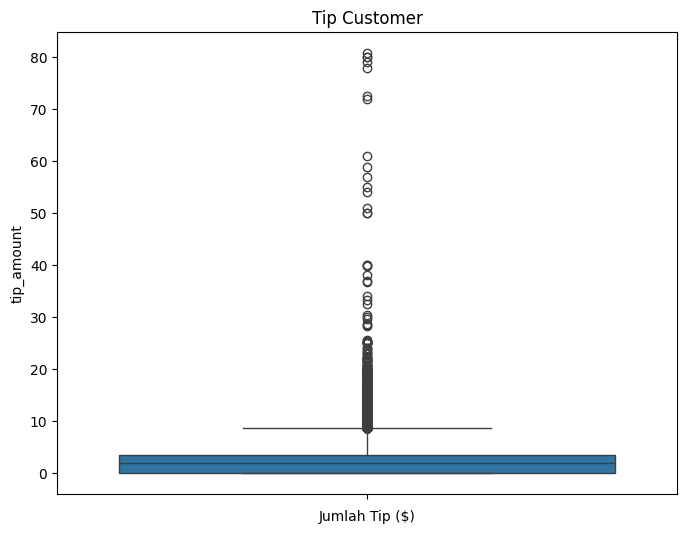

In [113]:
plt.figure(figsize=(8, 6))
sns.boxplot(df['tip_amount'])

plt.title('Tip Customer')
plt.xlabel('Jumlah Tip ($)')
plt.show()

### TIP VS Numeric column

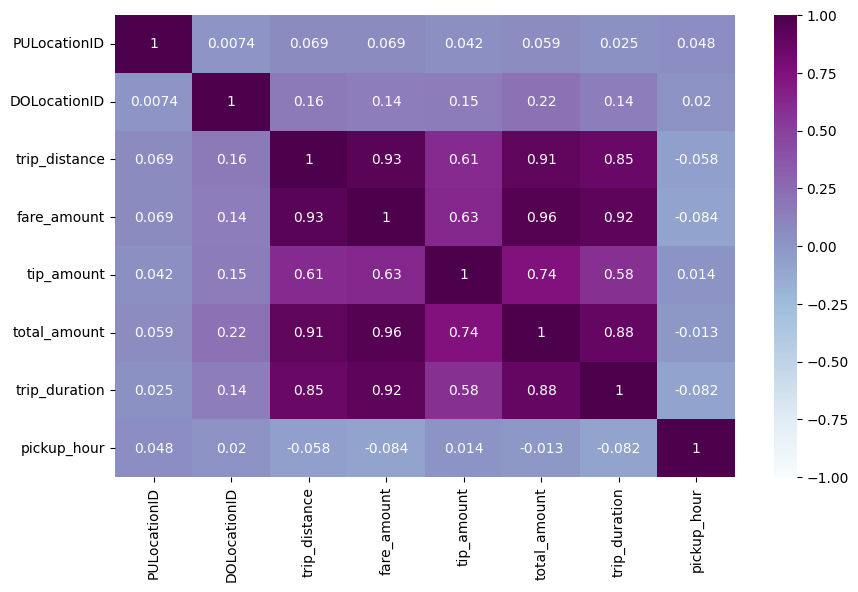

In [114]:
df_tip_corr = df.select_dtypes(np.number)[df['tip_amount']>0]

plt.figure(figsize=(10,6))
sns.heatmap(df_tip_corr.corr('spearman'), vmin=-1, vmax=1, annot=True, cmap="BuPu")
plt.show()

**insight**:<br>
bedasarkan coorelasi bahwa tip_amount dipengaruhi oleh :
- trip distance (0.61)<br>
semakin jauh trip perjalanan maka semakin besar tip yang akan diberikan.
- trip duration (0.58)<br>
semakin lama trip perjalanan maka semakin besar tip yang akan diberikan.
- fare amount (0.63) dan total amount (0.74)<br>
semakin besar biaya perjalanan maka semakin besar tip yang akan diberikan.

### TIP VS Kategoric column

In [115]:
for col in df.select_dtypes(object):
    print(col)

VendorID
RatecodeID
passenger_count
payment_type
trip_type
PUBorough
PUZone
DOBorough
DOZone
day
day_category
category_tip
pickup_date


#### Category day

In [116]:
df.select_dtypes(object)

,VendorID,RatecodeID,passenger_count,payment_type,trip_type,PUBorough,PUZone,DOBorough,DOZone,day,day_category,category_tip,pickup_date
0,VeriFoneInc,Standard rate,1.0,Credit card,Street-hail,Manhattan,Morningside Heights,Manhattan,Lincoln Square West,Sunday,Weekend,low,2023-01-01
1,VeriFoneInc,Standard rate,1.0,Credit card,Street-hail,Manhattan,Bloomingdale,Manhattan,Central Park,Sunday,Weekend,low,2023-01-01
3,"CreativeMobileTechnologies,LLC.",Standard rate,1.0,Credit card,Street-hail,Manhattan,Central Harlem,Manhattan,Upper West Side North,Sunday,Weekend,low,2023-01-01
4,"CreativeMobileTechnologies,LLC.",Standard rate,1.0,Credit card,Street-hail,Manhattan,Central Harlem,Manhattan,East Harlem North,Sunday,Weekend,nol,2023-01-01
5,VeriFoneInc,Standard rate,1.0,Cash,Street-hail,Manhattan,Central Harlem,Manhattan,Yorkville East,Sunday,Weekend,nol,2023-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,VeriFoneInc,Standard rate,1.0,Unknown,Street-hail,Brooklyn,Clinton Hill,Brooklyn,Crown Heights South,Tuesday,Weekdays,nol,2023-01-31
68207,VeriFoneInc,Standard rate,1.0,Unknown,Street-hail,Queens,Baisley Park,Queens,Saint Albans,Tuesday,Weekdays,nol,2023-01-31
68208,VeriFoneInc,Standard rate,1.0,Credit card,Street-hail,Brooklyn,DUMBO/Vinegar Hill,Brooklyn,Bushwick South,Tuesday,Weekdays,low,2023-01-31
68209,VeriFoneInc,Standard rate,1.0,Credit card,Street-hail,Brooklyn,Stuyvesant Heights,Brooklyn,Prospect Heights,Tuesday,Weekdays,low,2023-01-31


In [117]:
categoryday_tip_corr = df[df['tip_amount'] > 0][['day_category', 'tip_amount']]

agg_categoryday_tip = categoryday_tip_corr.groupby('day_category').agg(
    count=('tip_amount', 'count'),
    avg_tip=('tip_amount', 'mean'),
    median_tip=('tip_amount', 'median')
).round(2).reset_index()

agg_categoryday_tip 

,day_category,count,avg_tip,median_tip
0,Weekdays,28871,3.65,3.00
1,Weekend,9552,3.74,3.01


C:\Users\ghais\AppData\Local\Temp\ipykernel_20352\3114126037.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='day_category', y='tip_amount', data=df[df['tip_amount'] > 0], palette=sns.color_palette("husl", 2))


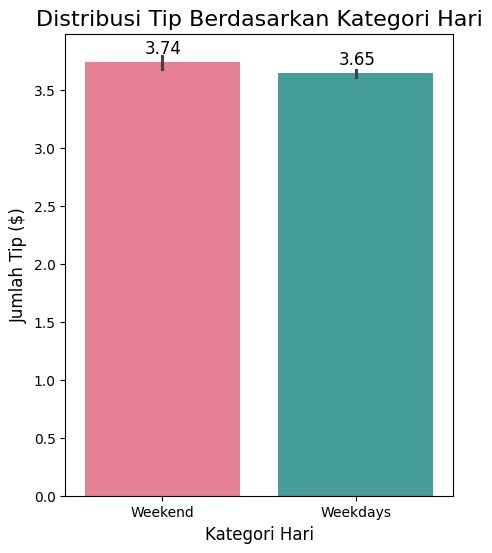

In [118]:
plt.figure(figsize=(5,6))

ax = sns.barplot(x='day_category', y='tip_amount', data=df[df['tip_amount'] > 0], palette=sns.color_palette("husl", 2))

# Menambahkan angka (nilai) di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',  # Menambahkan nilai tip (dengan 2 desimal)
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posisi teks
                ha='center', va='center',  # Menyelaraskan posisi teks
                fontsize=12, color='black',  # Ukuran dan warna font
                xytext=(1, 10),  # Menambahkan sedikit offset agar teks tidak bertumpuk dengan batang
                textcoords='offset points')

plt.title('Distribusi Tip Berdasarkan Kategori Hari', fontsize=16)
plt.xlabel('Kategori Hari', fontsize=12)
plt.ylabel('Jumlah Tip ($)', fontsize=12)

plt.show()

Akan dilakukan hipotesis apakah memiliki pengaruh variabel tip dan cat day atau tidak
 
**Hypothesis**:

**Ho**: Tidak ada perbedaan median tip antara hari akhir pekan dan hari kerja.

**Ha**: Terdapat perbedaan median tip antara hari akhir pekan dan hari kerja.

In [119]:
from scipy.stats import mannwhitneyu

stat, pvalue= mannwhitneyu(
    categoryday_tip_corr[categoryday_tip_corr['day_category'] == 'Weekend']['tip_amount'],
    categoryday_tip_corr[categoryday_tip_corr['day_category'] == 'Weekdays']['tip_amount'],
    alternative='two-sided'
)

print('p-Value', pvalue)

if pvalue > 0.05:
    print('Terima H0, tidak ada perbedaan signifikan antara tip weekend dan weekdays')
else:
    print('Tolak H0, ada perbedaan signifikan antara tip weekend dan weekdays')

p-Value 0.0007608923416864268
Tolak H0, ada perbedaan signifikan antara tip weekend dan weekdays


#### Category Time

In [120]:
cattime_tip_corr = df[df['tip_amount'] > 0][['category_time', 'tip_amount']]

agg_cattime_tip = cattime_tip_corr.groupby('category_time').agg(
    count=('tip_amount', 'count'),       
    avg_tip=('tip_amount', 'mean'),      
    median_tip=('tip_amount', 'median') 
).round(2).reset_index() 

agg_cattime_tip

C:\Users\ghais\AppData\Local\Temp\ipykernel_20352\705828747.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_cattime_tip = cattime_tip_corr.groupby('category_time').agg(


,category_time,count,avg_tip,median_tip
0,early morning,1774,4.20,3.16
1,morning,8361,3.60,2.85
2,afternoon,8354,3.75,3.06
3,evening,8744,3.74,3.14
4,night,11190,3.52,3.00


C:\Users\ghais\AppData\Local\Temp\ipykernel_20352\3943460241.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  bars = sns.barplot(data=agg_cattime_tip, x='category_time', y='median_tip', ci=0, palette=sns.color_palette("husl", 5))
C:\Users\ghais\AppData\Local\Temp\ipykernel_20352\3943460241.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=agg_cattime_tip, x='category_time', y='median_tip', ci=0, palette=sns.color_palette("husl", 5))


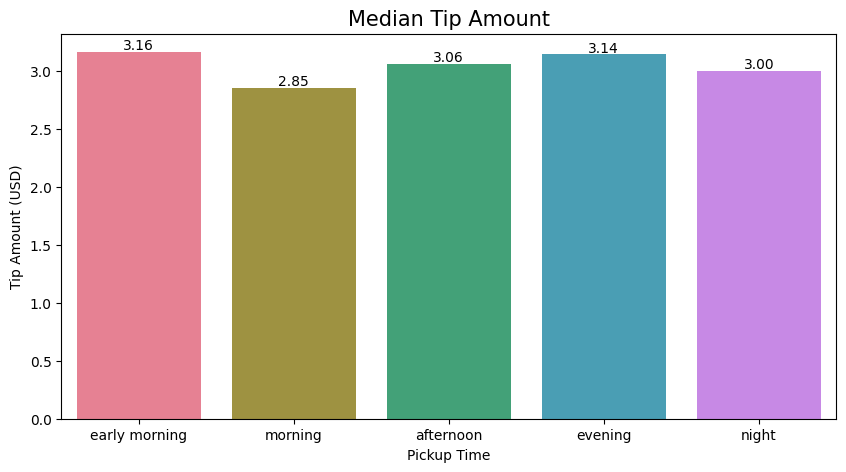

In [121]:
plt.figure(figsize=(10,5))

bars = sns.barplot(data=agg_cattime_tip, x='category_time', y='median_tip', ci=0, palette=sns.color_palette("husl", 5))
for idx, bar in enumerate(bars.patches):
    x_value = bar.get_x() + bar.get_width() / 2
    y_value = bar.get_height() + 0.02
    label = "{:.2f}".format(agg_cattime_tip['median_tip'].iloc[idx]) 
    plt.text(x_value, y_value, label, ha='center')
    
plt.xlabel('Pickup Time')
plt.ylabel('Tip Amount (USD)')
plt.title('Median Tip Amount', fontsize=15)
plt.show()

**Hypothesis**:

**H0**: Tidak ada perbedaan yang signifikan dalam median tip antara kategori waktu yang berbeda (early morning, morning, afternoon, evening, dan night).

**Ha**: Terdapat perbedaan yang signifikan dalam median tip setidaknya antara satu kategori waktu dengan kategori waktu lainnya (early morning, morning, afternoon, evening, night).

In [122]:
from scipy.stats import kruskal

stat, pvalue= kruskal(
    cattime_tip_corr[cattime_tip_corr['category_time'] == 'early morning']['tip_amount'],
    cattime_tip_corr[cattime_tip_corr['category_time'] == 'morning']['tip_amount'],
    cattime_tip_corr[cattime_tip_corr['category_time'] == 'afternoon']['tip_amount'],
    cattime_tip_corr[cattime_tip_corr['category_time'] == 'evening']['tip_amount'],
    cattime_tip_corr[cattime_tip_corr['category_time'] == 'night']['tip_amount'],
)

print('p-Value', pvalue)

if pvalue > 0.05:
    print('Terima H0: Tidak ada perbedaan signifikan dalam median tip antar kategori waktu (early morning, morning, afternoon, evening, night)')
else:
    print('Tolak H0: Ada perbedaan signifikan dalam median tip setidaknya satu kategori waktu dibandingkan kategori waktu lainnya')

p-Value 1.620702800326165e-35
Tolak H0: Ada perbedaan signifikan dalam median tip setidaknya satu kategori waktu dibandingkan kategori waktu lainnya


#### Trip Type

In [123]:
trip_type_tip_corr = df[df['tip_amount']>0][['trip_type', 'tip_amount']]
ct_tip_trip_type= trip_type_tip_corr.groupby('trip_type').agg(count=('tip_amount', 'count'), avg_tip=('tip_amount', 'mean'), median_tip=('tip_amount', 'median')).round(2).reset_index()
ct_tip_trip_type

,trip_type,count,avg_tip,median_tip
0,Dispatch,318,6.29,4.7
1,Street-hail,38105,3.65,3.0


C:\Users\ghais\AppData\Local\Temp\ipykernel_20352\1504367324.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=ct_tip_trip_type, x='trip_type', y='median_tip',palette=sns.color_palette("husl", 2))


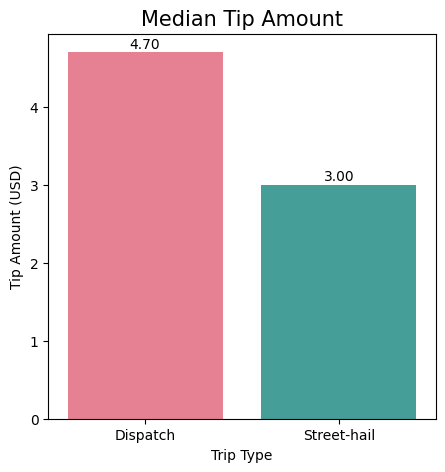

In [124]:
plt.figure(figsize=(5,5))

bars = sns.barplot(data=ct_tip_trip_type, x='trip_type', y='median_tip',palette=sns.color_palette("husl", 2))
for idx, bar in enumerate(bars.patches):
    x_value = bar.get_x() + bar.get_width() / 2
    y_value = bar.get_height() + 0.05
    label = "{:.2f}".format(ct_tip_trip_type['median_tip'].iloc[idx]) 
    plt.text(x_value, y_value, label, ha='center')

plt.xlabel('Trip Type')
plt.ylabel('Tip Amount (USD)')
plt.title('Median Tip Amount', fontsize=15)

plt.show()

**Hypothesis**:

**H0**: Tidak ada perbedaan yang signifikan dalam median tip antara tipe perjalanan street-hail dan tipe perjalanan yang dipesan melalui aplikasi.

**Ha**: Median tip pada tipe perjalanan street-hail lebih rendah daripada median tip pada tipe perjalanan melalui aplikasi.

In [125]:
from scipy.stats import mannwhitneyu

stat, pvalue= mannwhitneyu(
    trip_type_tip_corr[trip_type_tip_corr['trip_type'] == 'Street-hail']['tip_amount'],
    trip_type_tip_corr[trip_type_tip_corr['trip_type'] == 'Dispatch']['tip_amount'],
    alternative='less'
)

print('p-Value', pvalue/2)

if pvalue > 0.05:
    print('Terima H0 yang berarti tidak ada perbedaan signifikan dalam median tip antara street-hail dan aplikasi.')
else:
    print('Tolak H0 yang berarti median tip pada perjalanan street-hail lebih rendah dibandingkan dengan perjalanan melalui aplikasi.')

p-Value 3.204395257054632e-17
Tolak H0 yang berarti median tip pada perjalanan street-hail lebih rendah dibandingkan dengan perjalanan melalui aplikasi.


#### RatecodeID

In [126]:
ratecode_tip_corr = df[df['tip_amount']>0][['RatecodeID', 'tip_amount']]
ct_tip_ratecode= ratecode_tip_corr.groupby('RatecodeID').agg(count=('tip_amount', 'count'), avg_tip=('tip_amount', 'mean'), median_tip=('tip_amount', 'median')).round(2).reset_index()
ct_tip_ratecode

,RatecodeID,count,avg_tip,median_tip
0,JFK Airport,122,14.95,15.61
1,Negotiated fare,366,5.97,4.15
2,Newark Airport,12,17.18,16.98
3,Standard rate,37923,3.61,3.00


C:\Users\ghais\AppData\Local\Temp\ipykernel_20352\2613214171.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  bars = sns.barplot(data=ct_tip_ratecode, x='RatecodeID', y='median_tip', ci=0, palette=sns.color_palette("husl", 4))
C:\Users\ghais\AppData\Local\Temp\ipykernel_20352\2613214171.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=ct_tip_ratecode, x='RatecodeID', y='median_tip', ci=0, palette=sns.color_palette("husl", 4))


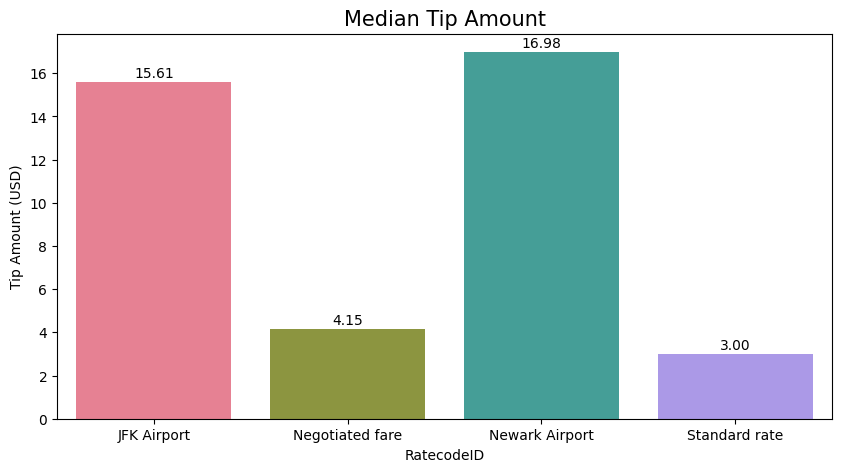

In [127]:
plt.figure(figsize=(10,5))

bars = sns.barplot(data=ct_tip_ratecode, x='RatecodeID', y='median_tip', ci=0, palette=sns.color_palette("husl", 4))
for idx, bar in enumerate(bars.patches):
    x_value = bar.get_x() + bar.get_width() / 2
    y_value = bar.get_height() + 0.2
    label = "{:.2f}".format(ct_tip_ratecode['median_tip'].iloc[idx]) 
    plt.text(x_value, y_value, label, ha='center')

plt.xlabel('RatecodeID')
plt.ylabel('Tip Amount (USD)')
plt.title('Median Tip Amount', fontsize=15)
plt.show()

**Hypothesis:**

**Ho**: tidak ada perbedaan signifikan dalam median tip di antara semua jenis tarif yang diuji (Standard Rate, JFK Airport, Newark Airport, dan Negotiated fare).

**Ha**: bahwa setidaknya ada satu pasang jenis tarif yang memiliki perbedaan signifikan dalam median tip.

In [128]:
stat, pvalue= kruskal(
    ratecode_tip_corr[ratecode_tip_corr['RatecodeID'] == 'Standard rate']['tip_amount'],
    ratecode_tip_corr[ratecode_tip_corr['RatecodeID'] == 'JFK Airport']['tip_amount'],
    ratecode_tip_corr[ratecode_tip_corr['RatecodeID'] == 'Newark Airport']['tip_amount'],
    ratecode_tip_corr[ratecode_tip_corr['RatecodeID'] == 'Negotiated fare']['tip_amount']
)

print('p-Value', pvalue)

if pvalue > 0.05:
    print('Terima H0: Tidak ada perbedaan signifikan dalam median tip antara tarif Standard Rate, JFK Airport, Newark Airport, Nassau or Westchester, dan Negotiated fare')
else:
    print('Tolak H0: Setidaknya ada satu pasang tarif yang memiliki median tip yang berbeda')

p-Value 4.904680170988434e-81
Tolak H0: Setidaknya ada satu pasang tarif yang memiliki median tip yang berbeda


#### Passanger count

In [129]:
passcount_tip_corr = df[df['tip_amount']>0][['passenger_count', 'tip_amount']]
ct_tip_passcount = passcount_tip_corr.groupby('passenger_count').agg(count=('tip_amount', 'count'), avg_tip=('tip_amount', 'mean'), median_tip=('tip_amount', 'median')).round(2).reset_index()
ct_tip_passcount

,passenger_count,count,avg_tip,median_tip
0,1.0,33249,3.63,3.00
1,2.0,2724,3.95,3.20
2,3.0,501,4.00,3.14
3,4.0,206,3.96,3.13
4,5.0,1101,4.06,3.14
5,>5,642,3.33,2.86


C:\Users\ghais\AppData\Local\Temp\ipykernel_20352\74422700.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=ct_tip_passcount, x='passenger_count', y='median_tip',palette=sns.color_palette("husl", 6))


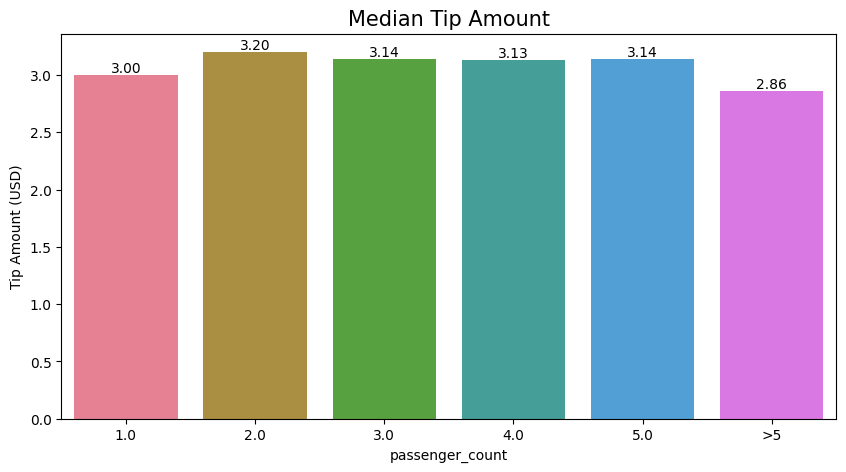

In [130]:
plt.figure(figsize=(10,5))

bars = sns.barplot(data=ct_tip_passcount, x='passenger_count', y='median_tip',palette=sns.color_palette("husl", 6))
for idx, bar in enumerate(bars.patches):
    x_value = bar.get_x() + bar.get_width() / 2
    y_value = bar.get_height() + 0.02
    label = "{:.2f}".format(ct_tip_passcount['median_tip'].iloc[idx]) 
    plt.text(x_value, y_value, label, ha='center')
    
plt.xlabel('passenger_count')
plt.ylabel('Tip Amount (USD)')
plt.title('Median Tip Amount', fontsize=15)
plt.show()

**Hypotesis**

**H0**: Tidak ada perbedaan signifikan dalam jumlah penumpang terhadap variabel yang diuji yaitu tip antara setiap kategori jumlah penumpang.

**Ha**: Ada perbedaan signifikan antara jumlah penumpang terhadap variabel yang diuji, namun tidak diketahui kategori jumlah penumpang mana yang memiliki perbedaan tersebut.

In [131]:
stat, pvalue= kruskal(
    passcount_tip_corr[passcount_tip_corr['passenger_count'] == '1.0']['tip_amount'],
    passcount_tip_corr[passcount_tip_corr['passenger_count'] == '2.0']['tip_amount'],
    passcount_tip_corr[passcount_tip_corr['passenger_count'] == '3.0']['tip_amount'],
    passcount_tip_corr[passcount_tip_corr['passenger_count'] == '4.0']['tip_amount'],
    passcount_tip_corr[passcount_tip_corr['passenger_count'] == '5.0']['tip_amount'],
    passcount_tip_corr[passcount_tip_corr['passenger_count'] == '>5']['tip_amount']
)

print('p-Value', pvalue)

if pvalue > 0.05:
    print('Terima H0: Tidak ada perbedaan signifikan dalam variabel yang diuji yaitu tip antara jumlah penumpang')
else:
    print('Tolak H0: Ada perbedaan signifikan antara jumlah penumpang, tapi tidak diketahui kategori mana yang berbeda')

p-Value 1.7600536507777315e-13
Tolak H0: Ada perbedaan signifikan antara jumlah penumpang, tapi tidak diketahui kategori mana yang berbeda


### Insight keseluruhan:
pengaruh orang memberikan tips adalah:

- **Dengan tingkat korelasi antara tip dan distance (0.61) dan trip duration (0.58)**, Perjalanan yang lebih panjang atau lebih lama (baik dalam hal jarak atau waktu) cenderung mendapatkan tip yang lebih besar. Hal ini menunjukkan bahwa pelanggan lebih mungkin memberikan tip lebih tinggi ketika mereka merasa perjalanan tersebut lebih jauh atau memakan waktu lebih lama, mungkin sebagai penghargaan atas kenyamanan atau upaya pengemudi.
- **Terdapat korelasi positif yang kuat yaitu (0.63) antara fare_amount (tarif perjalanan) dan tip_amount serta total amount (0.74)**. Semakin tinggi tarif perjalanan, semakin besar kemungkinan penumpang memberikan tip yang lebih besar. Ini menunjukkan bahwa penumpang mungkin merasa lebih cenderung untuk memberikan tip lebih besar pada perjalanan yang lebih mahal.
- **category_day dan category_time berpengaruh pada tip_amount**, hal ini disebabkan karena weekend merupakan vibes liburan dimana orang merasa bahagia dan lebih mungkin memberikan tip yang lebih besar. Sementara itu, category_time juga berpengaruh karena waktu dini pagi biasanya merupakan waktu yang krusial atau jarang ada taksi dimana orang lebih memilih untuk tidur maka kemungkinan besar customer mengapresiasi dengan memberikan tip kepada pengemudi. Hal ini menunjukkan bahwa waktu dan hari libur dapat mempengaruhi perilaku memberikan tip penumpang.
- **trip_type mempengaruhi tip_amount**, maka orang cenderung memberikan tip lebih banyak saat mereka menyetop taksi langsung di jalan (misalnya taksi yang dijumpai di jalan atau dipanggil langsung, bukan lewat aplikasi). Sebaliknya, jika mereka memesan taksi melalui aplikasi, tip yang diberikan cenderung lebih sedikit. hal ini disebabkan adanya interaksi satu sama lain sehingga menimbulkan kenyaman
- **RatecodeID mempengaruhi tip_amount**, Orang cenderung memberikan tip lebih banyak ketika pergi ke bandara dibandingkan dengan perjalanan dalam kota atau jarak pendek. hal ini bisa dikarenakan jarak yang jauh dan biaya yang mahal
- **passanger_count mempengaruhi tip_amount**, semakin banyak penumpang semakin besar tip yang diberikan. Hal ini bisa dikarenakan penumpang  merasa lebih nyaman dan lebih mungkin untuk memberikan tip yang lebih besar.

### Rekomendasi :
- **untuk meningkatkan trip_type pada distance (pesan lewat app)**, customer bisa di treath dengan lebih baik lagi agar merasa nyaman dan memberikan kemudahan untuk memberikan tip, bisa menambahkan fitur pada app untuk customer memberikan tip
- **memberikan pelayanan terbaik untuk perjalanan jauh seperti ke bandara**, seperti memberikan layanan yang premium seperti adanya fasilitas air gratis, membawakan barang-barang yang dibutuhkan saat di bandara, dan sebagainya. agar bisa meningkatnya tip yang diberikan
- **melakukan patroli secara berkala ketika permintaan demand yang tnggi**, hal ini bisa mendapatkan tip yang lebih tinggi karena memberikan pelayanan yang lebih baik dan memuaskan customer. customer tidak akan menunggu lebih lama lagi untuk mendapatkan jasa dari driver. dan juga bisa meningkatkan kepuasan customer.
- **customer memberikan feedback terhadap pelayanan supir**, hal ini dapat memberikan insight lebih dalam kenapa customer memberikan tip
- **meningkatkan kapasitas penumpang**, hal ini dapat memberikan kenyamanan bersama teman-teman dalam satu taksi , dan juga dapat meningkatkan tip yang diberikan.

## **Section 5. Conclusion and Recommendation**

### **5.1 Conclusion**

1. Demand taksi pada bulan januari:
- Secara umum, permintaan taksi menunjukkan pola yang konsisten sepanjang bulan Januari, dengan permintaan yang lebih tinggi selama hari kerja (weekdays), dan penurunan permintaan yang terlihat pada akhir pekan.
- Puncak permintaan terjadi pada sore hari, sedangkan permintaan paling rendah tercatat pada tengah malam hingga pagi hari. Manhattan mencatatkan permintaan tertinggi, sementara Staten Island menunjukkan permintaan paling rendah di antara wilayah lainnya.
- Pelanggan lebih sering menggunakan taksi dengan tarif dalam kota melalui street-hail (menunggu taksi di pinggir jalan) dan lebih banyak membayar menggunakan kartu kredit atau uang tunai.

2. harga lebih rendah cenderung untuk orang ingin menggunakan layanan taksi, tetapi tidak menutup kemungkinan bahwa harga yang lebih tinggi tetap tidak mengurangi permintaan.

3. tip dapat dipengaruhi oleh faktor-faktor seperti lokasi,jarak, waktu, jumlah penumpang, dan total pembayaran. 
- lokasi ke bandara dapat tip lebih tinggi karena jarak yang lebih jauh dan waktu yang lebih lama.
- semakin jauh jarak tempuh, semakin tinggi tip yang diberikan.
- semakin lama waktu tempuh, semakin tinggi tip yang diberikan.
- weekend dan hari libur dapat memiliki tip yang lebih tinggi.
- semakin banyak penumpang, semakin tinggi tip yang diberikan.
- semakin tinggi total pembayaran, semakin tinggi tip yang diberikan.


### **5.2 Recommendation**

**Rekomendasi:**


startegi berdasarkan wilayah:

- Tingkatkan jumlah taksi di wilayah yang rame yaitu pada  wilayah Manhattan, agar kebutuhan customer terpenuhi dengan baik.

Strategi Berdasarkan Harga:

- Pertimbangkan untuk penyesuaian tarif berdasarkan permintaan. jika permintaan banyak maka bisa dinaikan tarifnya karena memiliki korelasi yang positif, tetapi masih dalam batas wajar agar tidak menurunkan peminat untuk menggunakan jasa taksi.

- Tawarkan promo atau diskon pada saat-saat permintaan rendah, misalnya pada tengah malam atau awal pagi, untuk menarik lebih banyak pelanggan.

- berikan juga penawaran khusus kepada pelanggan setia dengan memberikan diskon atau hadiah untuk setiap kali mereka menggunakan jasa. karena untuk mempertahankan orang yang naik taksi pada sore atau malam hari dan akan menggunakan jasa taksi untuk berangkat.

startegi untuk  meningkatkan kualitas Pelayanan:

- melatih para driver untuk lebih ramah dan profesional dalam melayani pelanggan. karena hal ini akan meningkatkan tip dan juga kepuasan pelanggan. semakin pelanggan puas maka akan meningkatkan kepercayaan mereka untuk menggunakan jasa taksi.

startegi pemasaran:

- Luncurkan promosi khusus untuk rute dengan fare amount tertinggi untuk menarik lebih banyak pelanggan.

- Pertimbangkan untuk memberikan diskon atau penawaran khusus di waktu atau wilayah dengan fare amount rata-rata yang lebih rendah untuk menarik lebih banyak pelanggan.

- Tawarkan paket atau promosi untuk perjalanan dengan jarak dan durasi yang lebih lama, mengingat dua faktor ini juga memiliki korelasi positif dengan tip.